## Automated Graph Generator

#### Student1: GOLLA KEDARKUMAR - D19014
#### Student2: YASH CHAUDHARY- D19038

#### Introduction:

In this project, we created an automated graph generator for the variables that are in the given data frame. We first divided the variables into continuous variables and Categorical variables.Then we iterated through each variable and plotted the corresponding graphs for that variable. i.e histogram, boxplot and scatter plot for continuous variables and bar graphs for Categorical variables.

In [10]:
import pandas as pd
import numpy as np
import os

In [7]:
cars=pd.read_csv("cars.csv")

In [27]:
fam=pd.read_csv("framingham.csv")

In [49]:
def columnsTypeFinder(dataFrame,allColumns,maxCategories=40):
    """!!! Function to split columns into Continuous and catogorical variables !!!"""
    maxCategories=40
    DataFrame=dataFrame.copy()
    columnDataTypes=DataFrame.dtypes
    continousColumns=[]
    categoriacalColumns=[]
    for col in allColumns:
        if "float" in str(columnDataTypes[col]):
            numcategories=len(list(pd.Categorical(DataFrame[col]).categories))
            if (numcategories <maxCategories):
                categoriacalColumns.append(col)    
            else:
                continousColumns.append(col)
        elif "int" in str(columnDataTypes[col]):
            numcategories=len(list(pd.Categorical(DataFrame[col]).categories))
            if (numcategories <maxCategories):
                #DataFrame[col]=DataFrame[col].astype("category")
                categoriacalColumns.append(col)    
            else:
                continousColumns.append(col)
        elif "object" in str(columnDataTypes[col]) or "bool" in str(columnDataTypes[col]):
            categoriacalColumns.append(col)
        elif "category" in str(columnDataTypes[col]):
            categoriacalColumns.append(col)
    return continousColumns,categoriacalColumns

#### Improvisation 1:

We have extended the simple box plot by adding the details of null values in the variables and all the univariant analysis information such as Mean, Median, Min, Max, Count, First five percentiles and last five percentiles, Q1, Q3, IQR, Lower whisker value, Upper whisker value, Total  number of outliers, Number of outliers above upper whisker , Number of outliers below  lower whisker and Correlation of the variable with other variables.

This graph gives complete univariant analysis details of a variable including the number of null values in the variable . If null values are present in a variable we can choose the values for the imputation from the information present in the boxplot. Additionally, the correlation of the variable with the other variables in the data frame also provided to use other variable data for imputation if necessary.


In [50]:
def boxplotter(df,column,continousColumns):
    """ !!! Function to create boxplot for the input variable with all the univariate details !!! """
    df=df.copy()
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import seaborn as sns
    sns.set()
    if np.sum(df[column].isnull()) >0:
        Line1="Number of Null values in the column are "+str(np.sum(df[column].isnull()))
        plt.gcf().text(0.125,0.1, Line1, fontsize=16)
        plt.title(column+" variable Box plot"+" after removing null values",fontsize=22)
    else:
        plt.title(column+" variable Box plot",fontsize=22)
    df=df.loc[df[column].notnull()]
    CM=df.corr()
    df=df.loc[df[column].notnull(),column]
    sns.boxplot(df,orient="v",width=0.4,color="lightgreen")
    plt.ylabel(column,fontsize=22)
    
    plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':100})
    columnSeries=df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.25,0.75,0.95,0.96,0.97,0.98,0.99])

    ylimit=0.88
    reducer=0.03
    for i in columnSeries.keys():
        ylimit=ylimit-reducer
        text=i+"="+str(round(columnSeries[i],2))
        plt.figtext(0.78,ylimit, text, wrap=True, horizontalalignment='left', fontsize=16)
    ylimit=0.1
    plt.gcf().text(0.125,ylimit-0.02,"Median="+str(columnSeries["50%"]) , fontsize=16)
    IQR=float(columnSeries["75%"])-float(columnSeries["25%"])
    IQRtext="Inter Quertail Range="+str(IQR)
    plt.gcf().text(0.125,ylimit-0.02*2, IQRtext, fontsize=16)
    LB=float(columnSeries["25%"])-1.5*IQR
    UB=float(columnSeries["75%"])+1.5*IQR
    outBLB=np.sum(df<LB)
    outAUB=np.sum(df>UB)
    totalOut=outBLB+outAUB
    #ylimit=0.0
    totalOutText="Total number of outliers are "+str(totalOut)
    plt.gcf().text(0.125,ylimit-0.02*3, totalOutText, fontsize=16)
    outBLBtext=str(outBLB)+" outliers are present below lower whisker"+"("+str(LB)+")"
    plt.gcf().text(0.125,ylimit-0.02*4, outBLBtext, fontsize=16)
    outAUBtext=str(outAUB)+" outliers are present above upper whisker"+"("+str(UB)+")"
    plt.gcf().text(0.125,ylimit-0.02*5, outAUBtext, fontsize=16)
    correlationSeries=CM[column]
    correlation=sorted(correlationSeries.iteritems(),key=lambda x:x[1])[::-1]
    plt.gcf().text(0.68,0.27, "correlation with other columns:", fontsize=16)
    ylimit=0.25
    intermidiate=1
    for i in correlation:
        if i[0]==column:
            continue
        elif i[0] in continousColumns:
            plt.gcf().text(0.70,ylimit-0.02*intermidiate,i[0]+"--->"+str(round(i[1],3)), fontsize=18)
            intermidiate+=1
        else:
            continue
            
    plt.savefig("NewBoxPlotFor"+column+"column.png")
    plt.show()
    plt.clf()

#### Improvisation 2:

We have created a scatter plot function which creates all the combination of scatter plots for the continuous variables. 
This scatter plots helps us in deciding to do any transformations on any variable for doing linear regression. And also we can get some idea about how the variables are correlated and any clusters are present in the data.

In [52]:
def scatterPlotter(dataFrame,continousCoulmns):
    """ !!! Function to create scatter plot between the Continuous variables !!!"""
    columnName=continousCoulmns[0]
    df=dataFrame.copy()
    CM=df.corr()
    correlationSeries=CM[columnName]
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set()
    plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':100})
    columnSeries=df[columnName]
    for i in range(len(continousCoulmns)):
        columnName=continousCoulmns[i]
        for col in continousCoulmns[i+1:]:
            if columnName==col:
                continue
            else:
                columnSeries=df[columnName]
                yCoulmnsSeries=df[col]
                sns.scatterplot(x=columnSeries,y=yCoulmnsSeries)
                plt.gcf().text(0.20,0.01,"Correlation between "+columnName+" and "+col+" is "+str(round(correlationSeries[col],3)), fontsize=16)
                plt.xlabel(columnName,fontsize=18)
                plt.ylabel(col,fontsize=18)
                plt.title("Scatter Plot between "+columnName+" and "+col,fontsize=22)
                plt.savefig("ScatterPlot"+col+columnName+"columns.png")
                plt.show()
                plt.clf()
            

In [46]:
def GraphsCreator(dataFrame,columnName="All",directory=None):
    """ !!! Function to create histogram,boxplot and scatter plot for Continuous variable and Bargraph for catogorical variables """
    DataFrame=dataFrame.copy()
    import os
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sys
    import numpy as np
    import pandas as pd
    import shutil
    sns.set()
    dir=os.getcwd()
    print("initial directory "+dir)
    access_rights = 0o755
    if directory==None:
        directory=os.getcwd()
        if os.path.isdir(directory+"/Visualizations"):
            shutil.rmtree(directory+"/Visualizations")
            os.mkdir(directory+"/Visualizations",access_rights)
            os.chdir(directory+"/Visualizations")
        else:
            os.mkdir(directory+"/Visualizations",access_rights)
            os.chdir(directory+"/Visualizations")
    if os.path.isdir(directory):
        os.chdir(directory)
        if os.path.isdir(directory+"/Visualizations"):
            shutil.rmtree(directory+"/Visualizations")
            os.mkdir(directory+"/Visualizations",access_rights)
            os.chdir(directory+"/Visualizations")
        else:
            os.mkdir(directory+"/Visualizations",access_rights)
            os.chdir(directory+"/Visualizations")
    else:
        print("please enter valid directory.")
        print(directory+" does not exist")
        sys.exit()
    try:
        
        allColumns=[]
        if columnName=="All":
            allColumns=list(DataFrame.columns)
        elif type(columnName) is str:
            allColumns.append(columnName)
        elif len(columnName)>=1:
            for column in columnName:
                allColumns.append(column)

            
        sns.set()
        columnDataTypes=DataFrame.dtypes
        continousColumns,categoriacalColumns=columnsTypeFinder(DataFrame,allColumns)
        for col in allColumns:
            if col in continousColumns:
                #Plotting Histogram for Continuos variable
                plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':100})
                plt.hist(DataFrame[col])
                plt.xlabel(col,fontsize=16)
                plt.ylabel("Frequency",fontsize=16)
                plt.title(col+" distribution",fontsize=22)
                plt.savefig("HstogramFor"+col+"column.png")
                plt.clf()
                #Plotting Box plot for Continous variable
                boxplotter(DataFrame,col,continousColumns)
                
        
            elif col in categoriacalColumns:
                plt.bar(pd.Categorical(DataFrame[col]).categories,DataFrame[col].value_counts(sort=False))
                plt.xlabel(col,fontsize=16)
                plt.ylabel("Frequency",fontsize=16)
                plt.title(col+" distribution",fontsize=22)
                plt.savefig("BarChartFor"+col+"column.png")
                plt.clf()
        #Scatter plot between continous variables to see how the data is spread
        scatterPlotter(DataFrame,continousColumns)
        os.chdir(dir)
        fDir=os.getcwd()
        print("Final directory "+fDir)
    except e:
        print(e)
    
    
        
    


initial directory C:\Users\USER\Desktop\SEM1Pythonproject


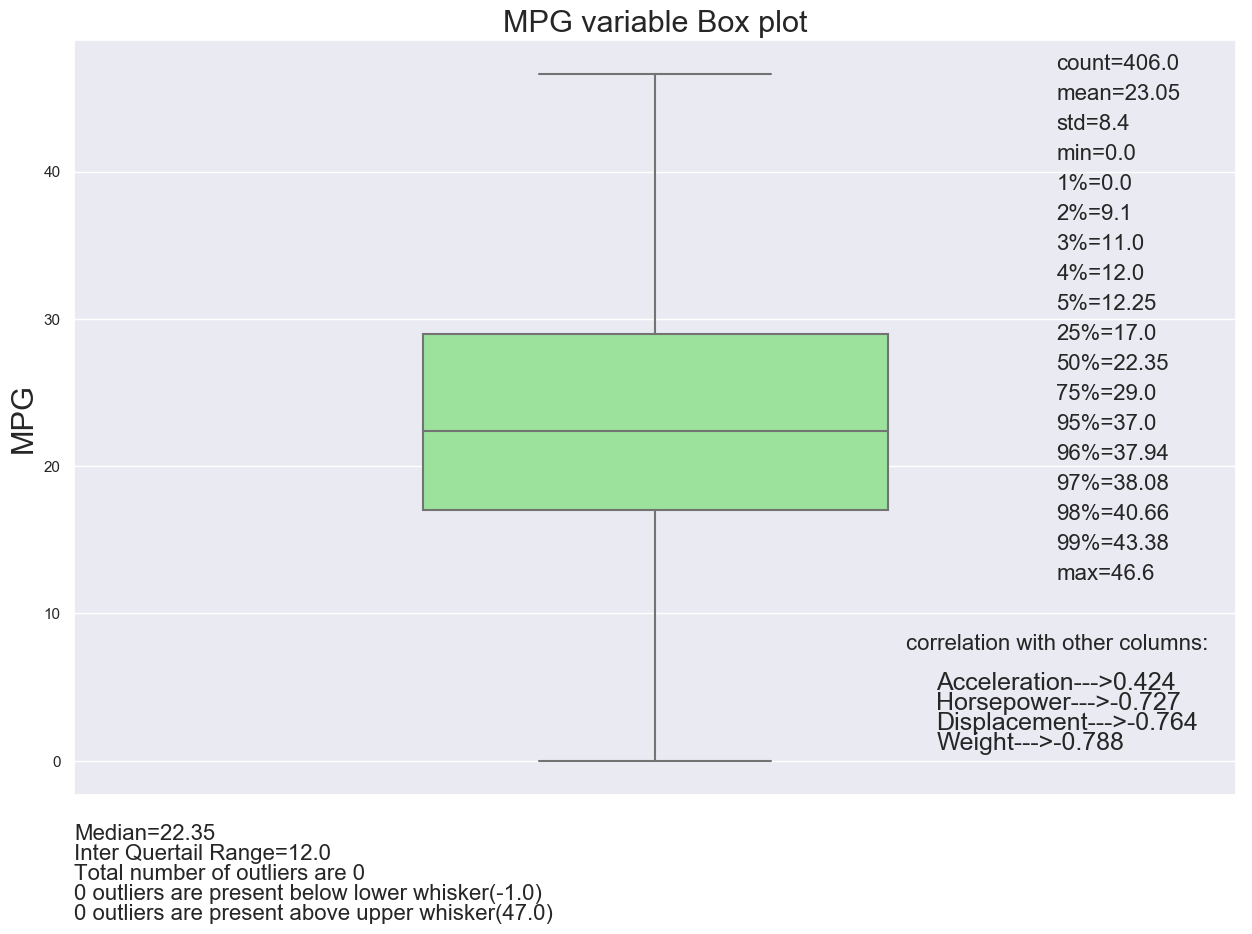

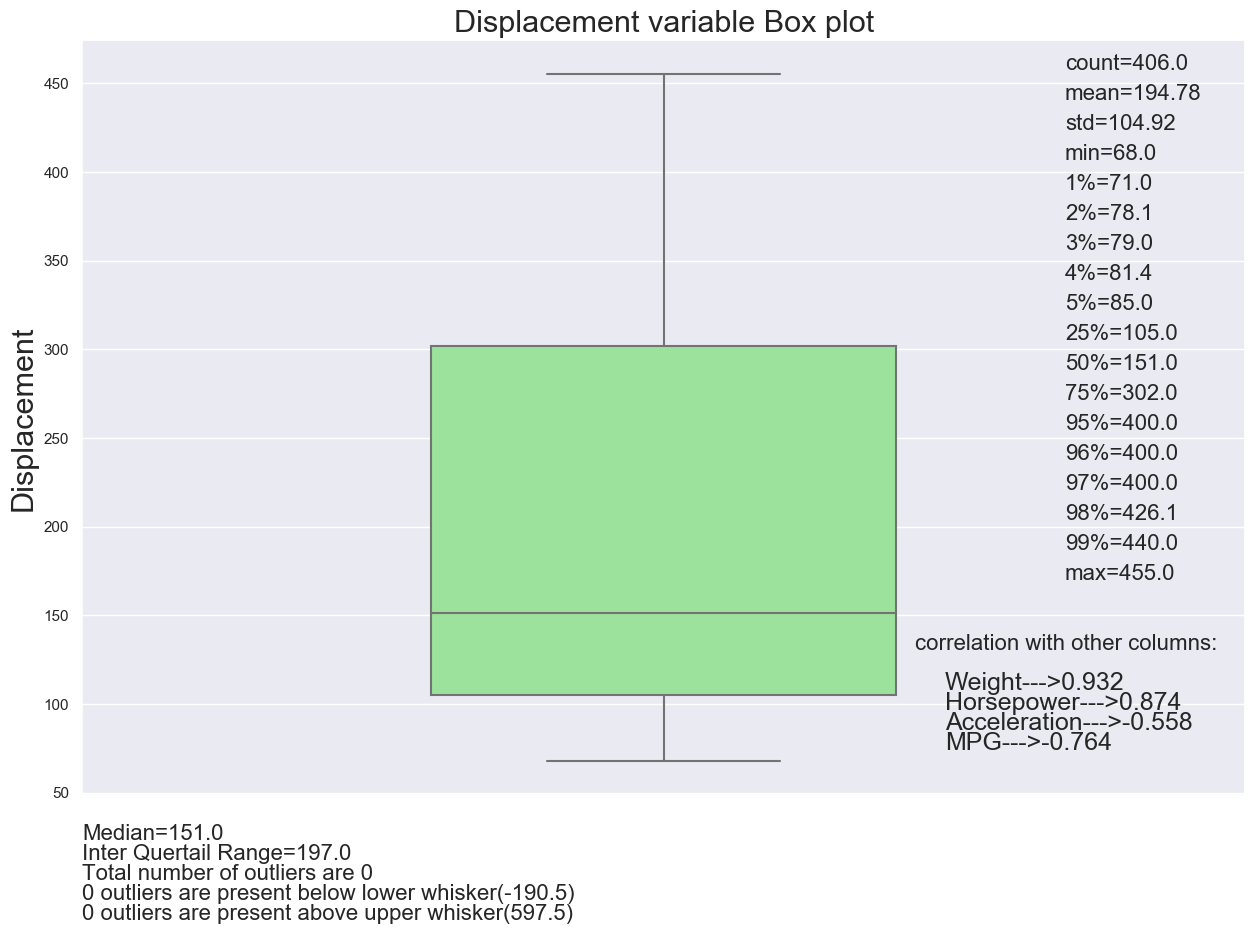

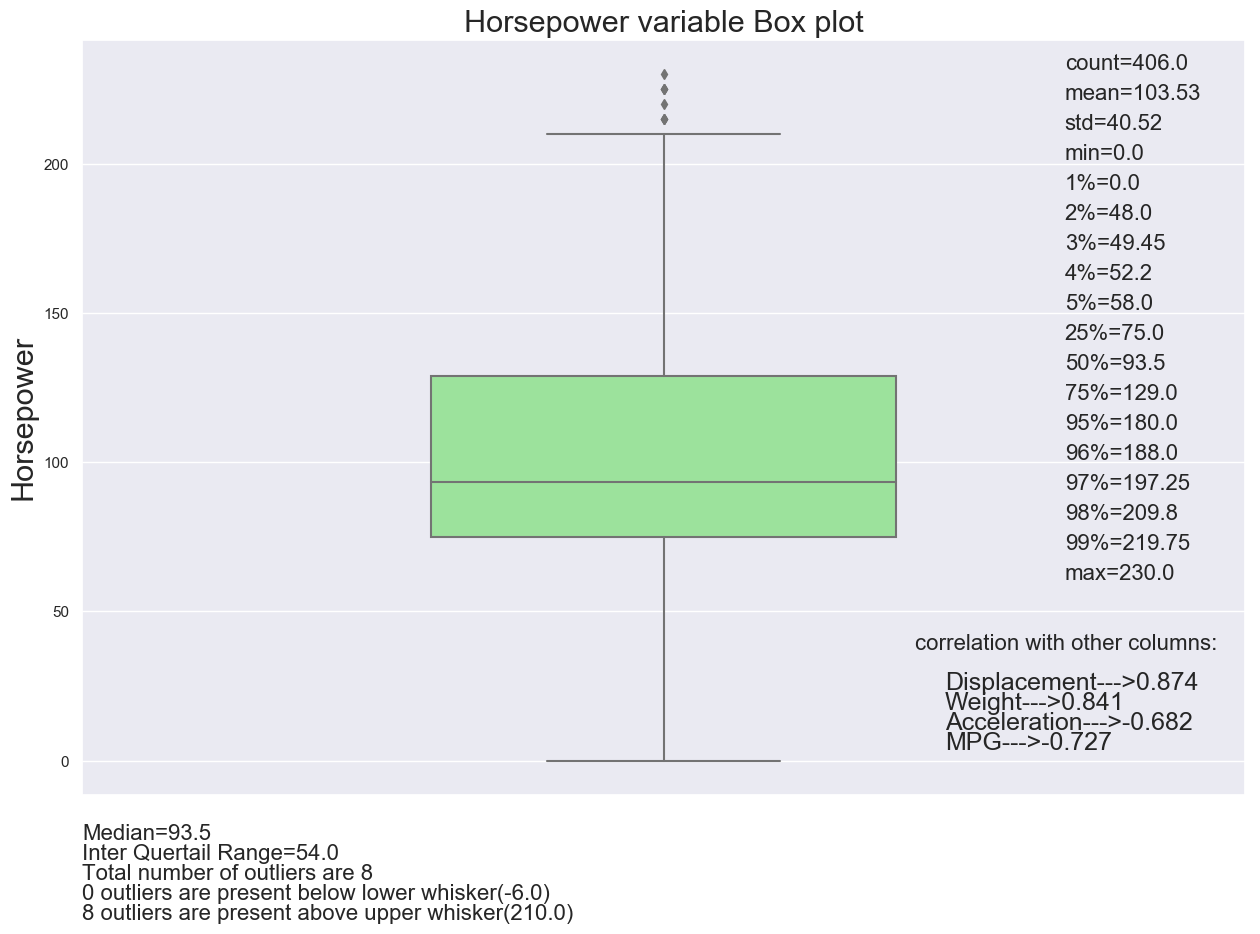

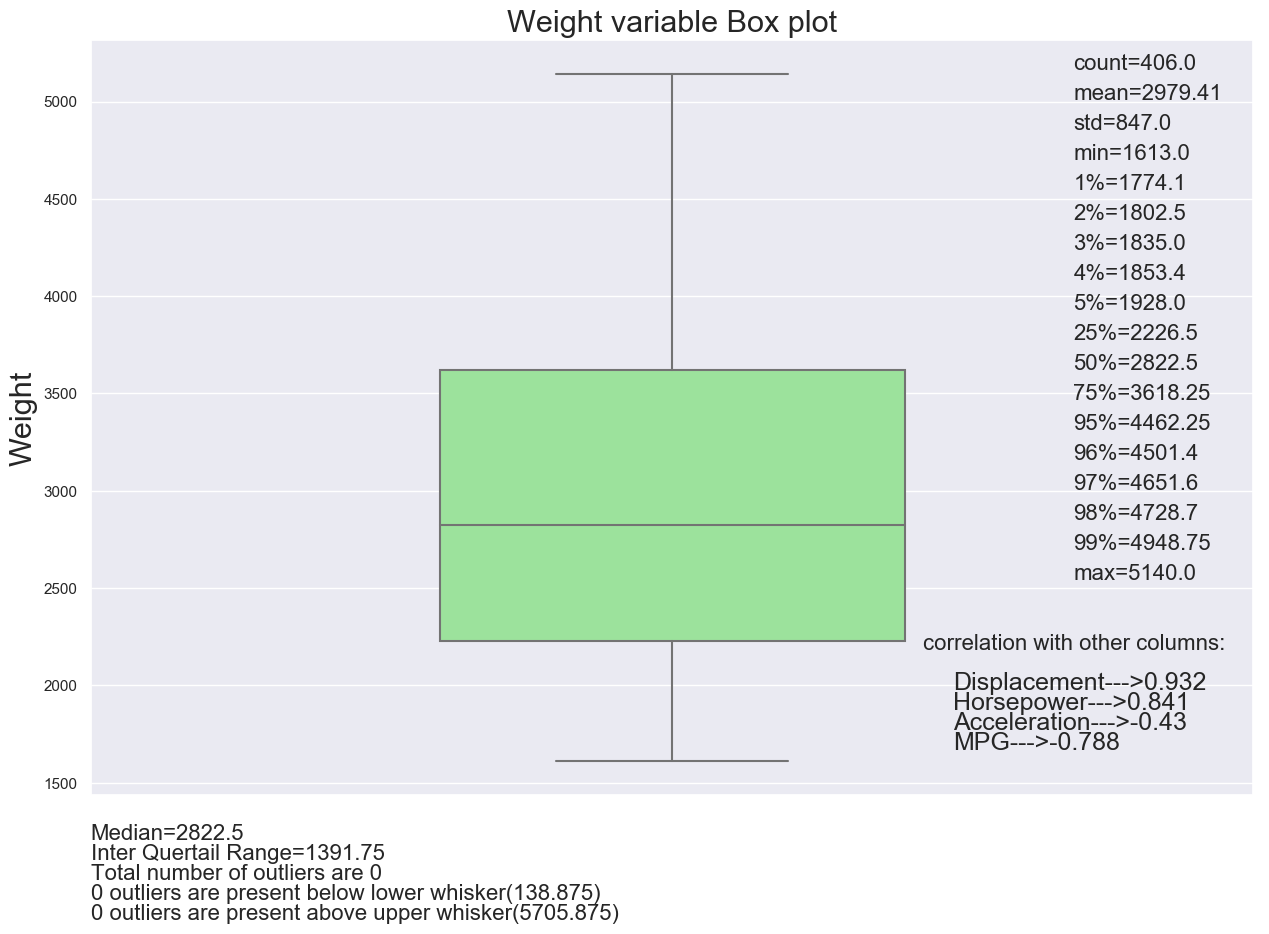

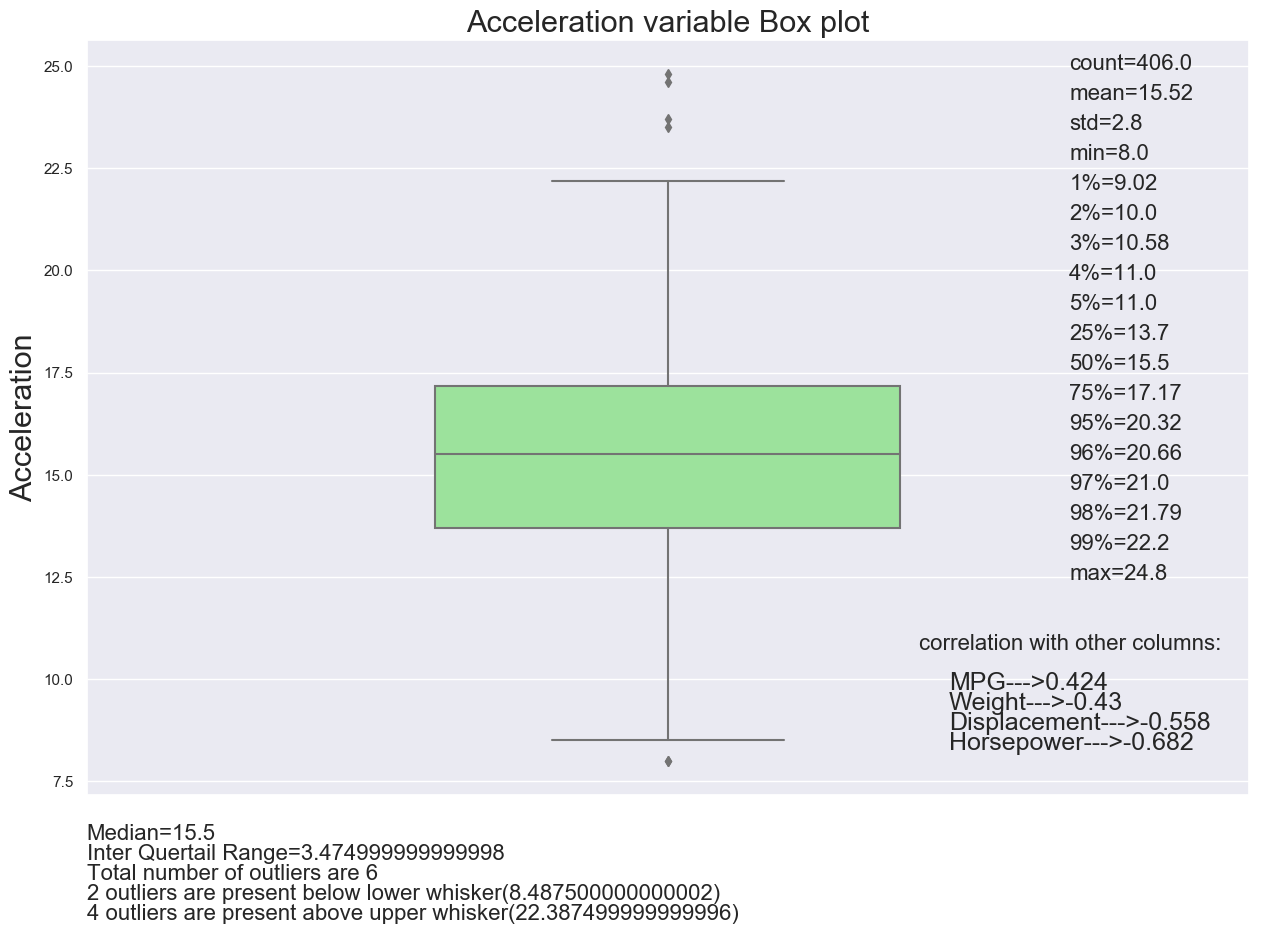

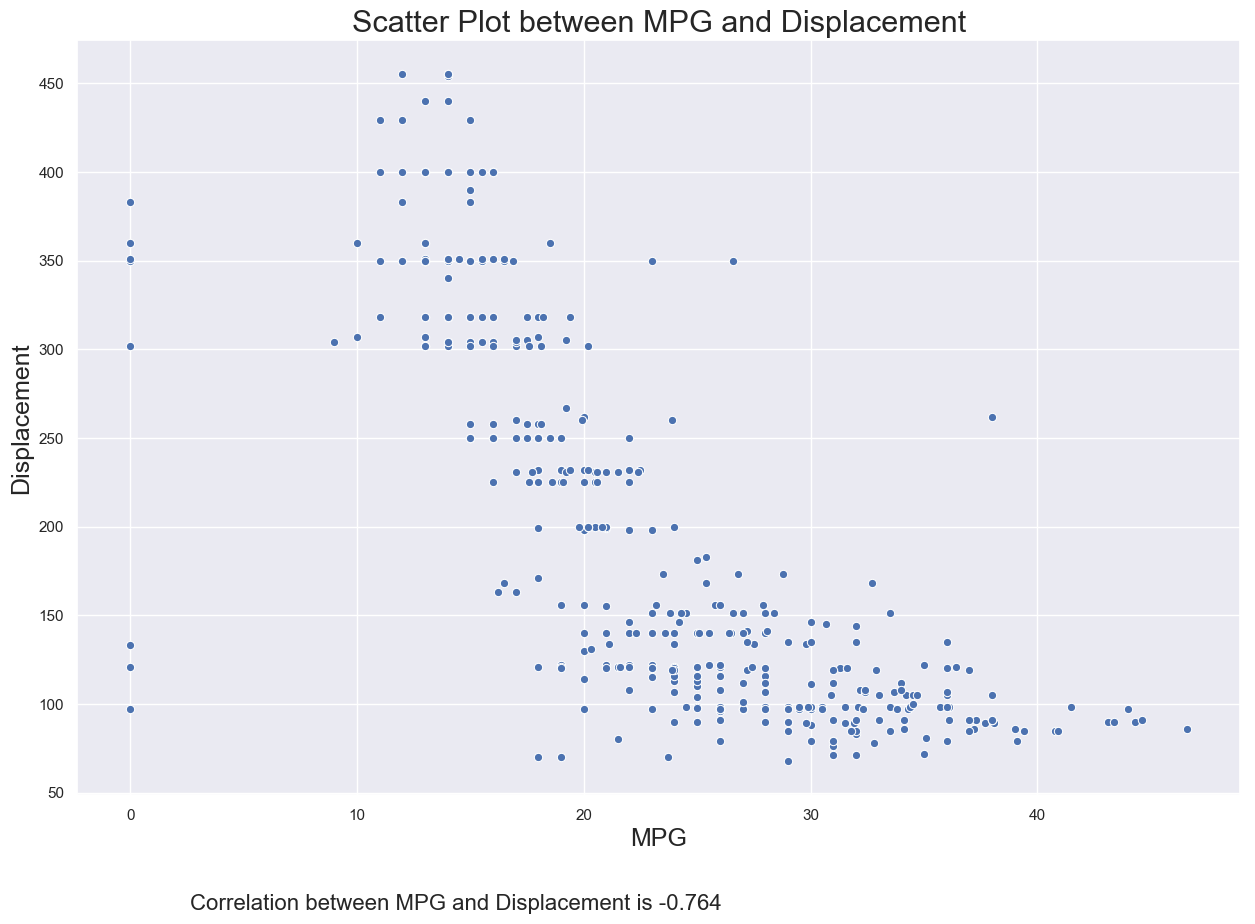

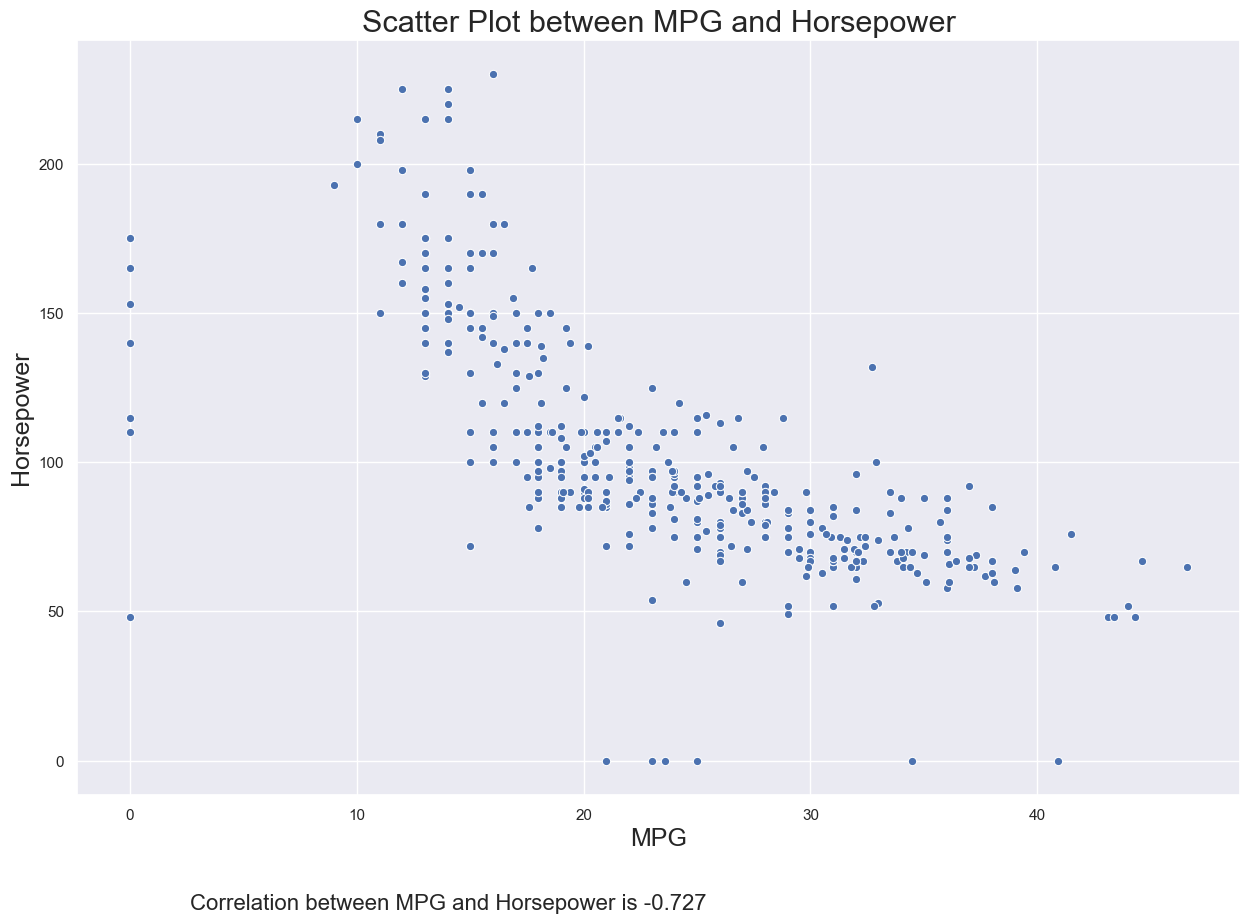

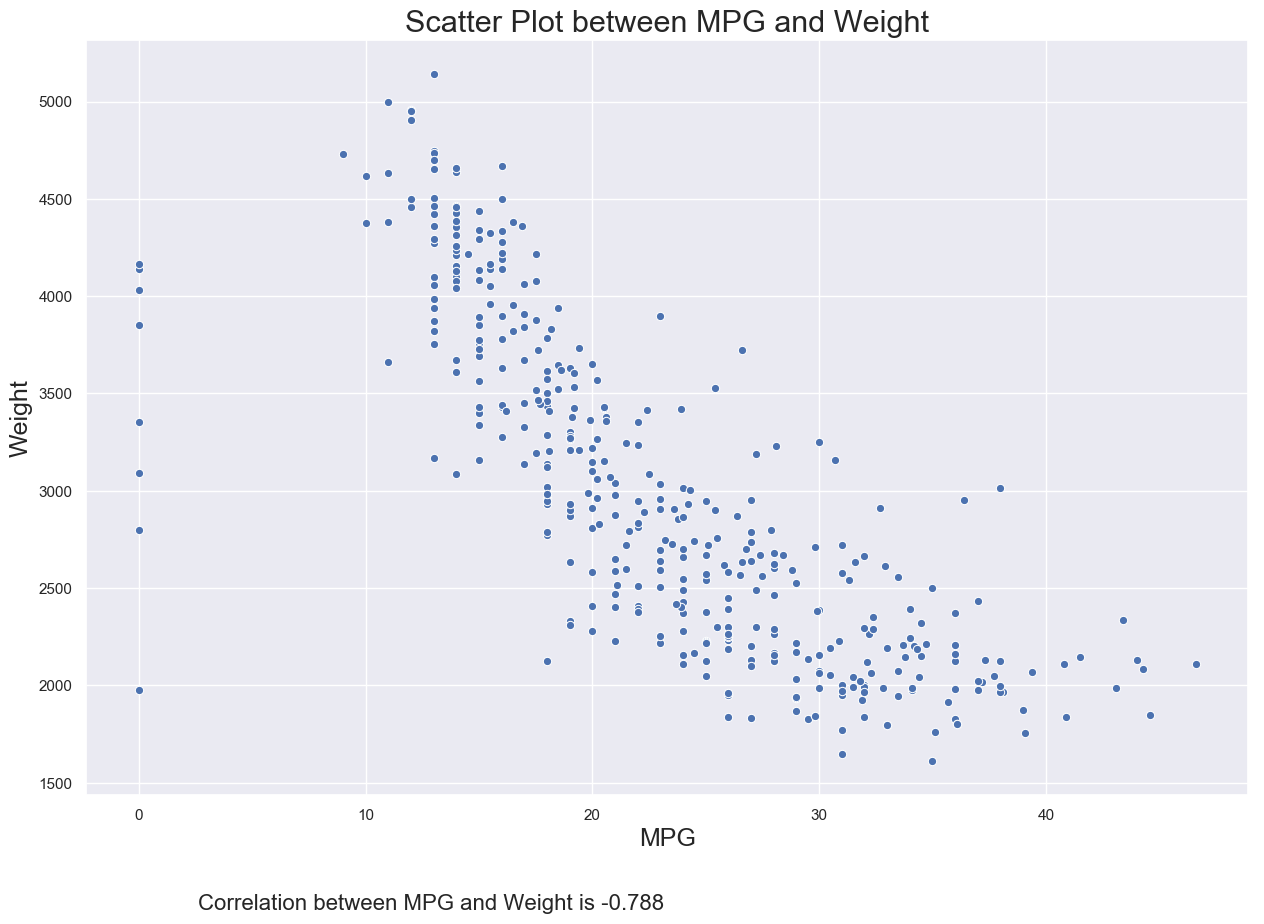

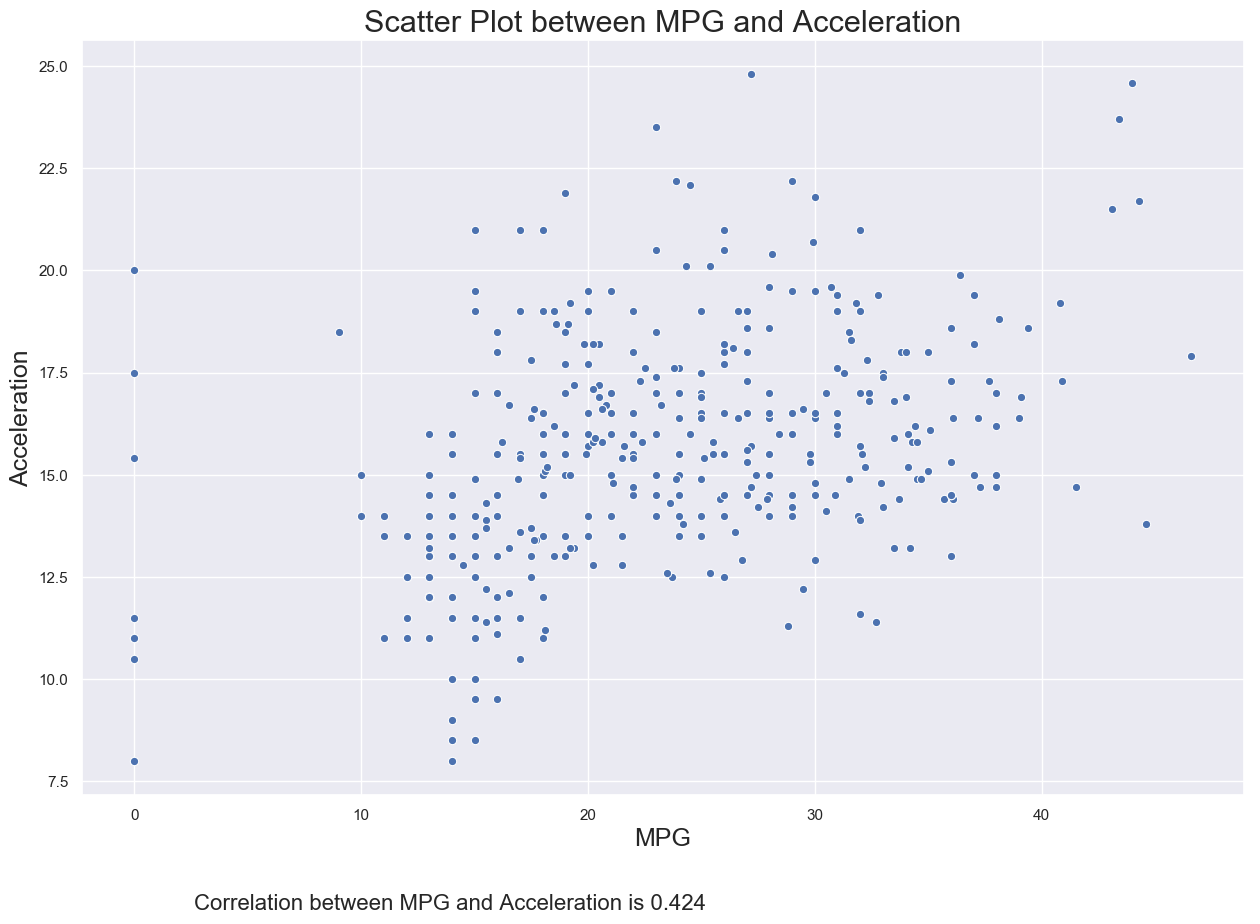

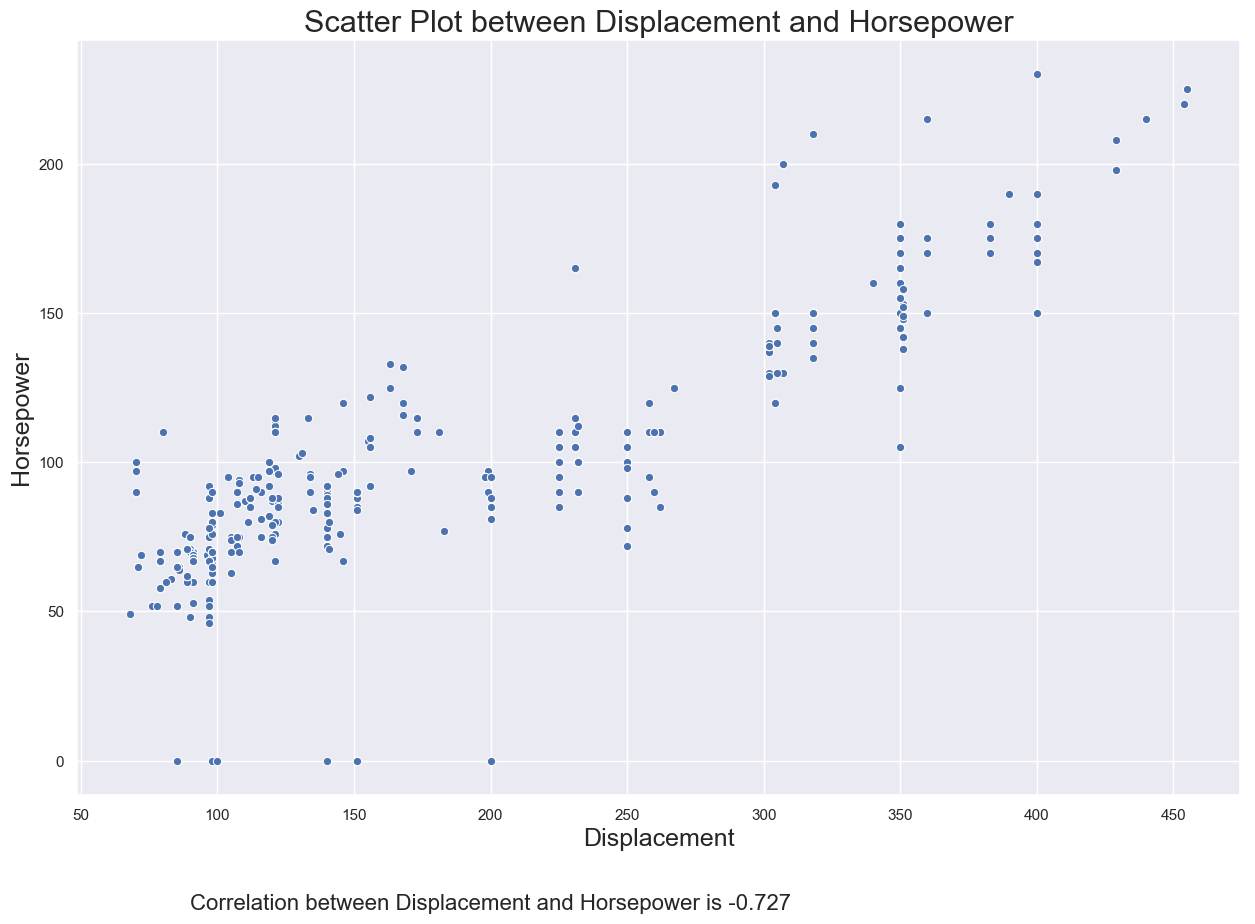

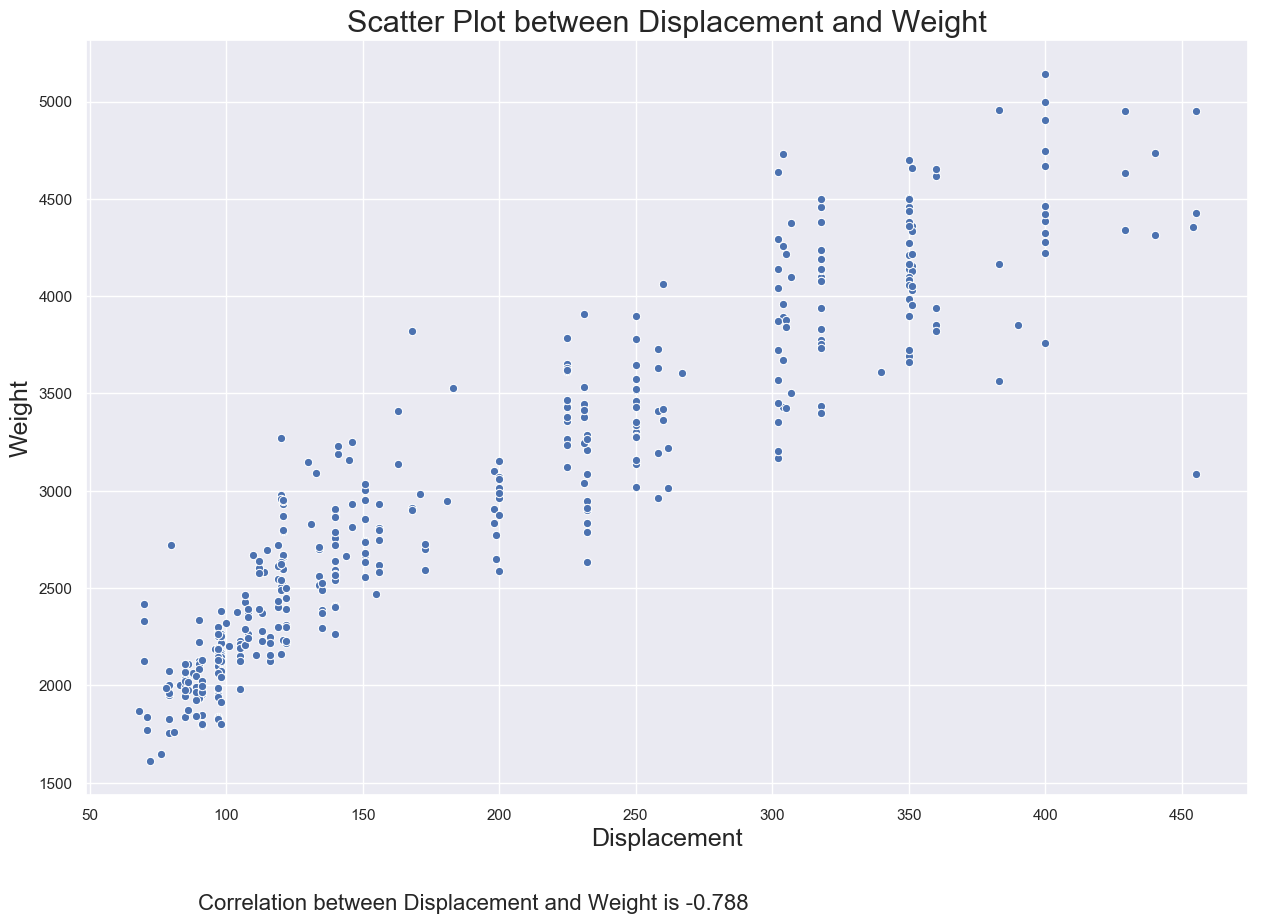

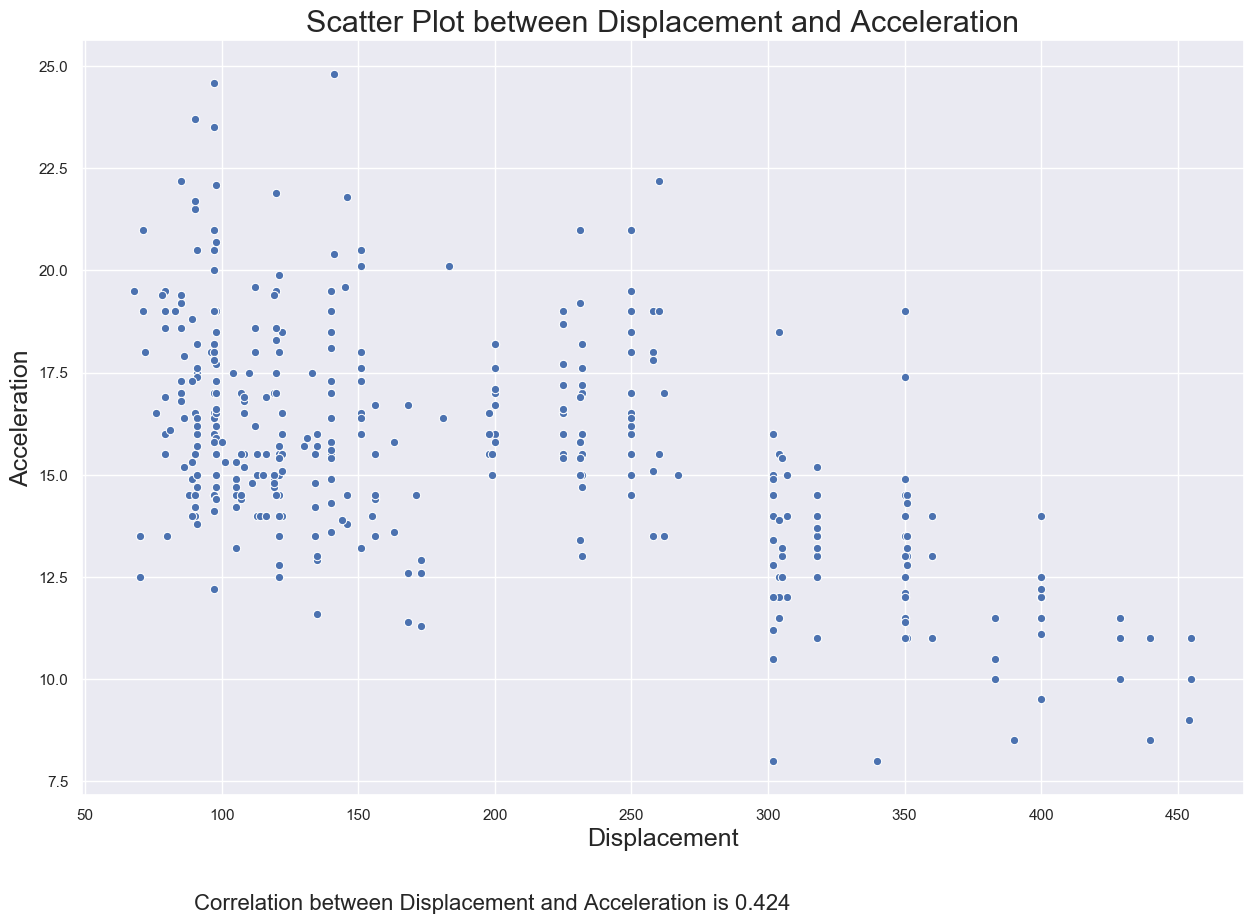

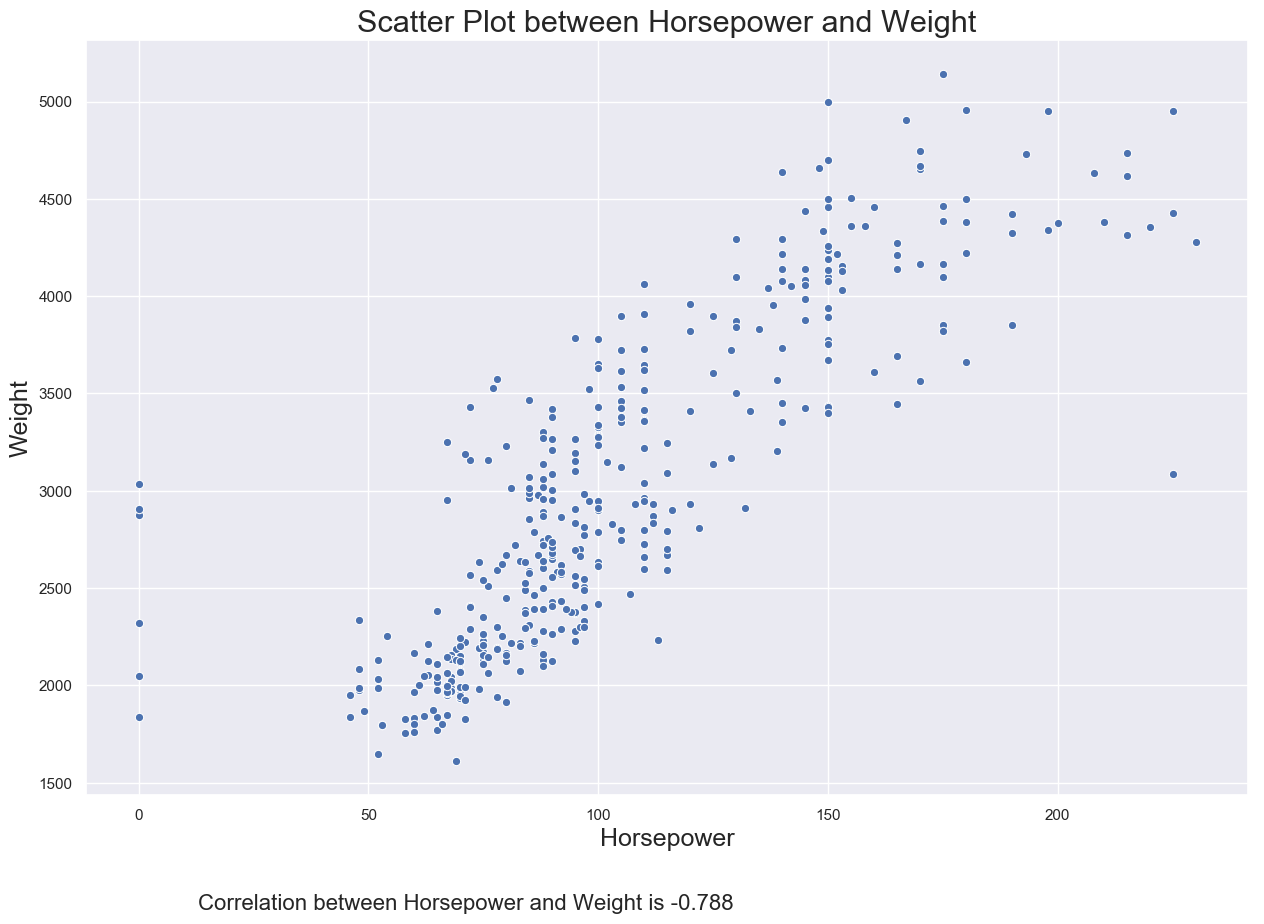

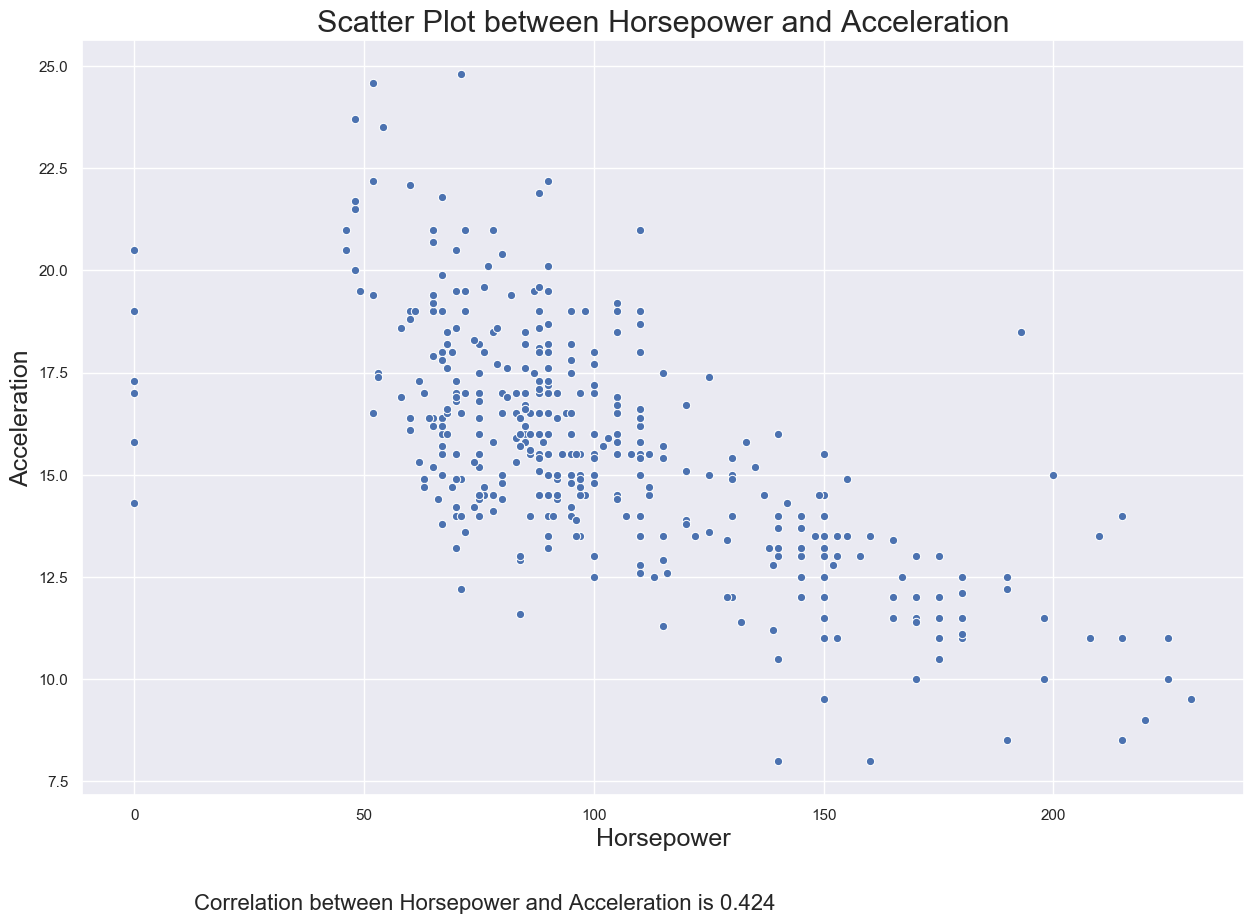

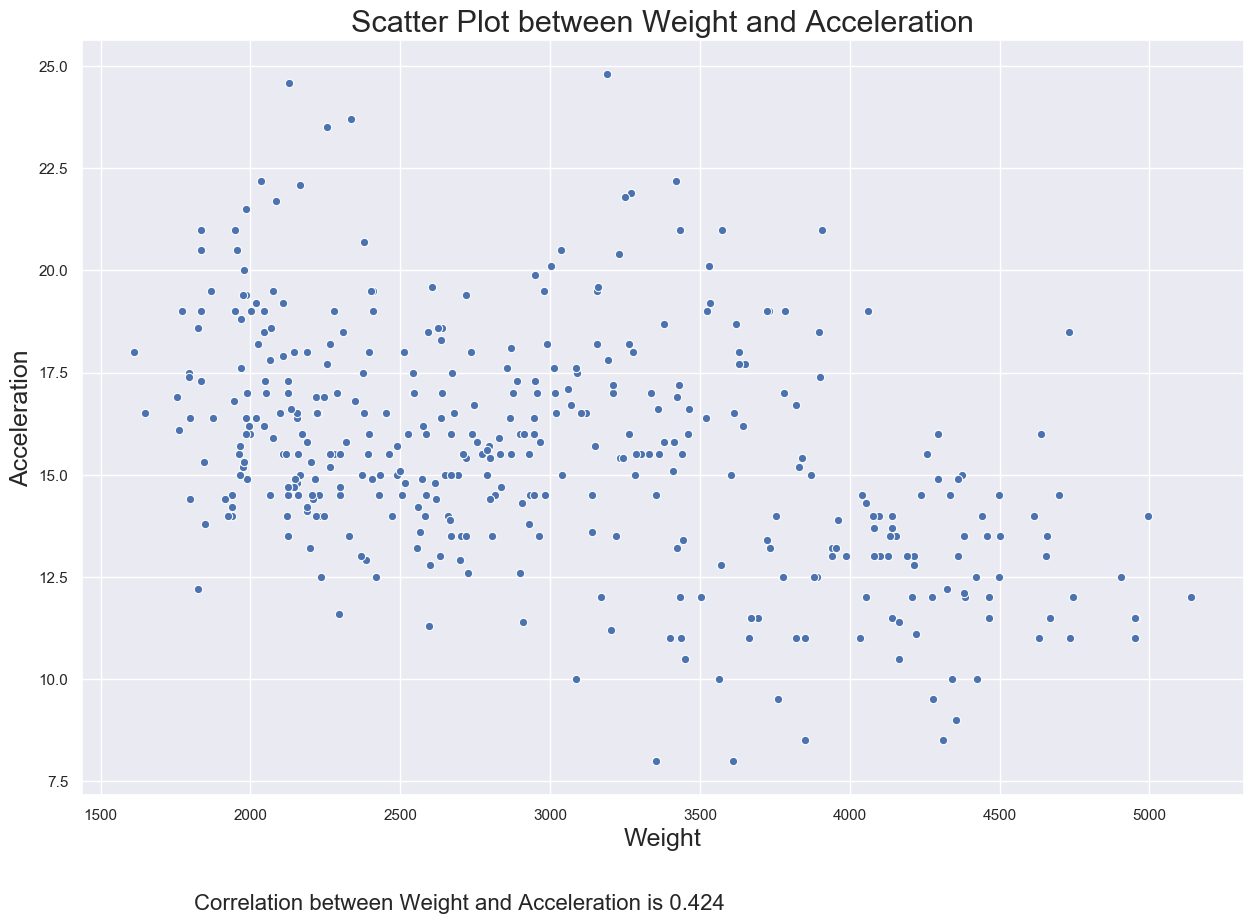

Final directory C:\Users\USER\Desktop\SEM1Pythonproject


<Figure size 1500x1000 with 0 Axes>

In [56]:
GraphsCreator(cars)

initial directory C:\Users\USER\Desktop\SEM1Pythonproject


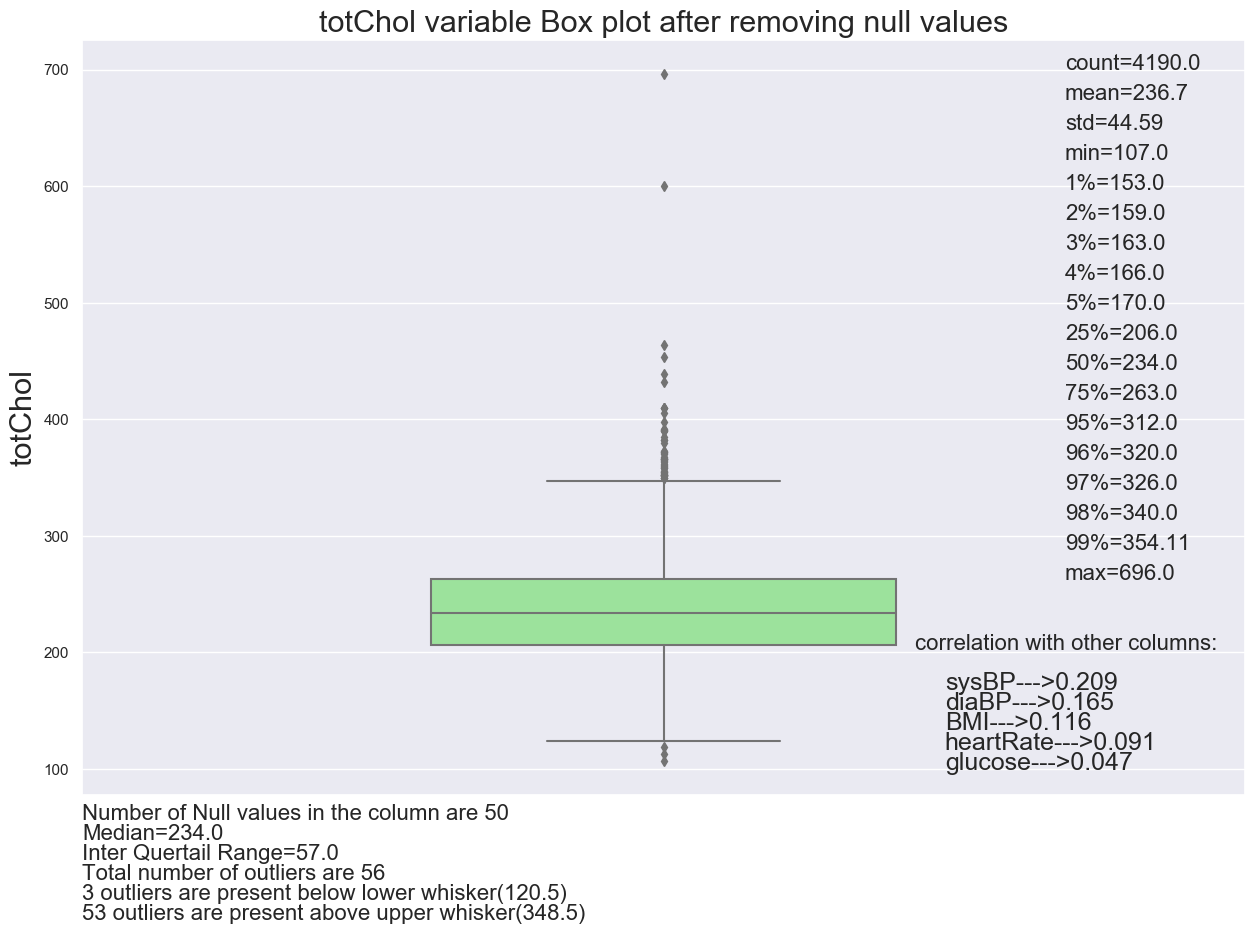

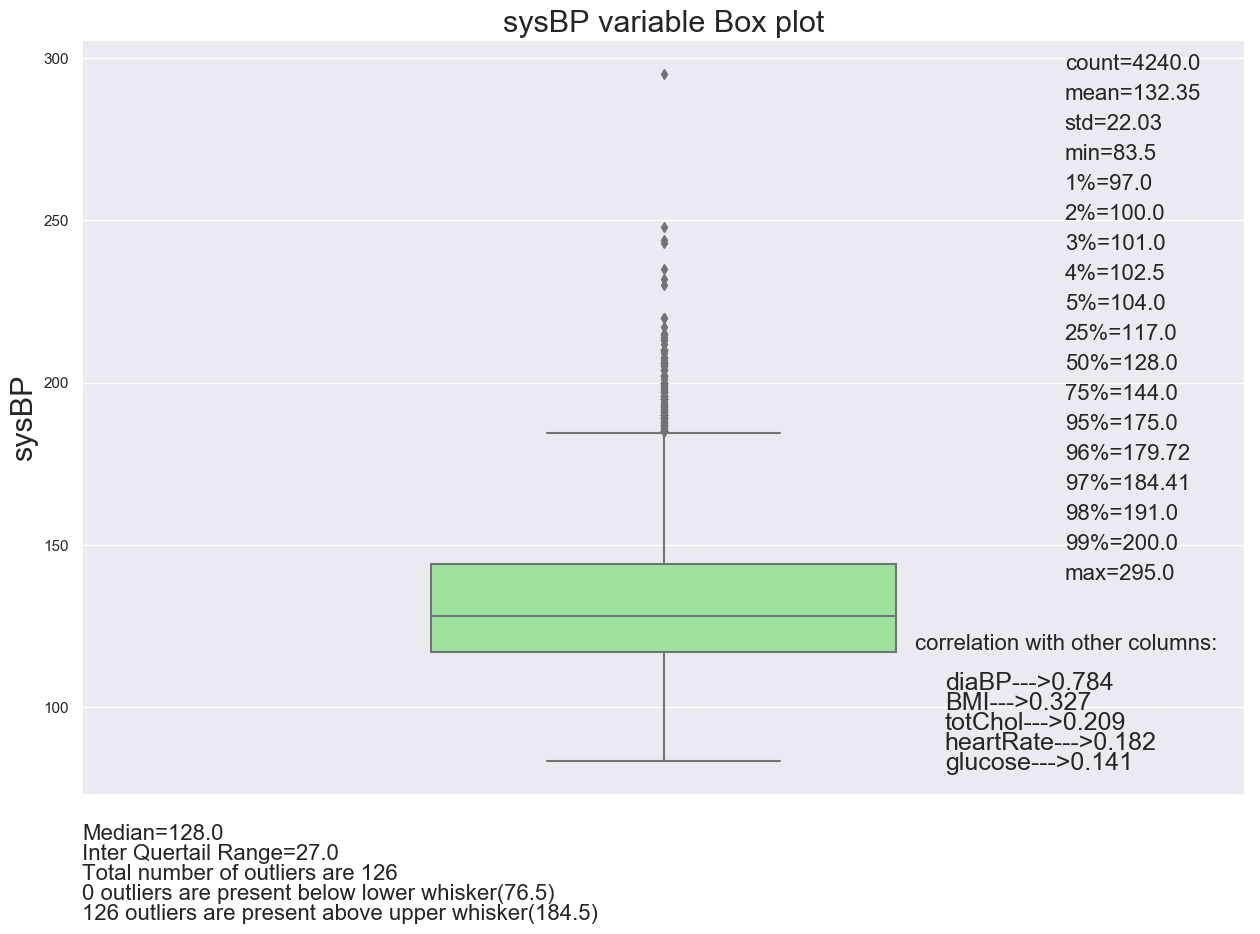

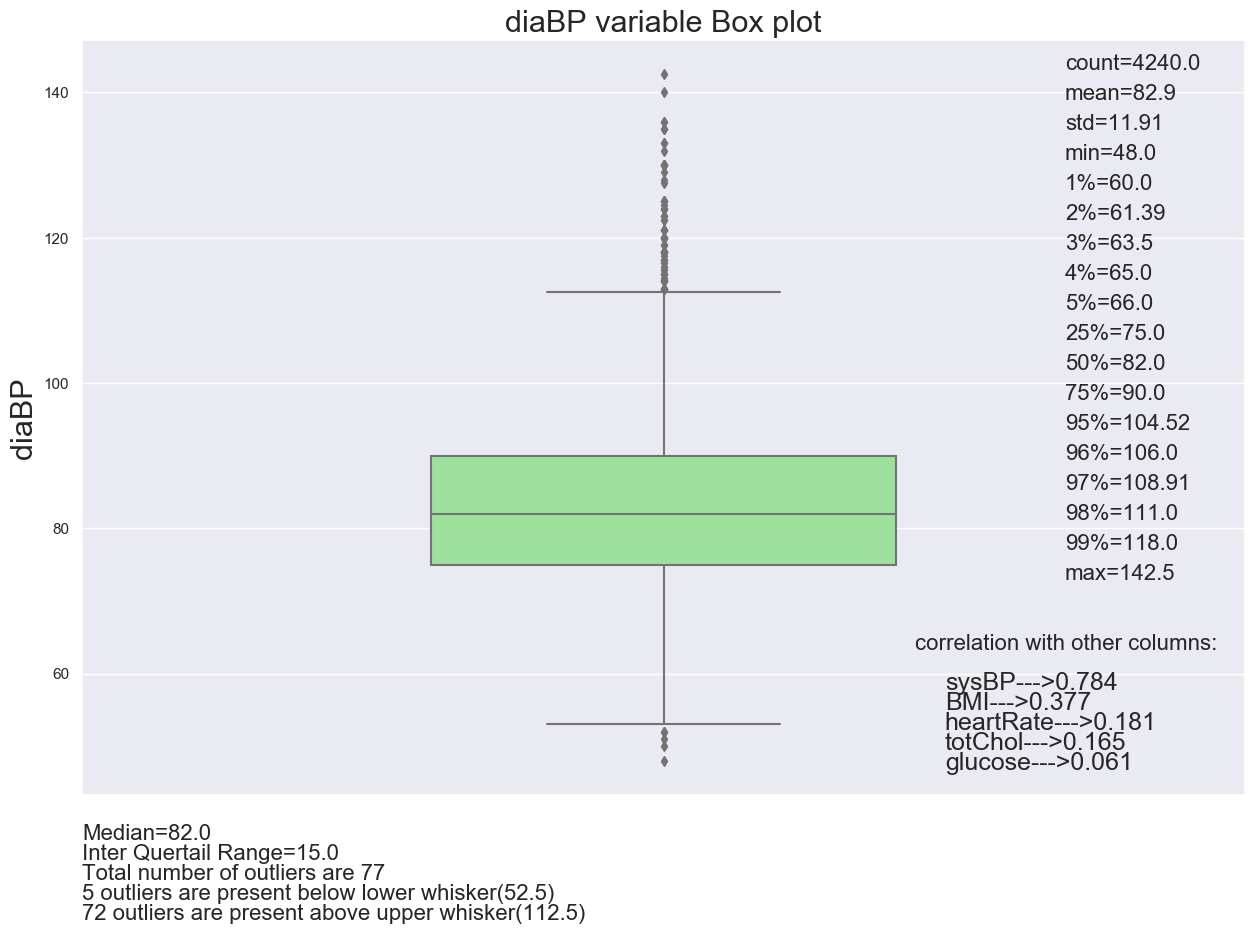

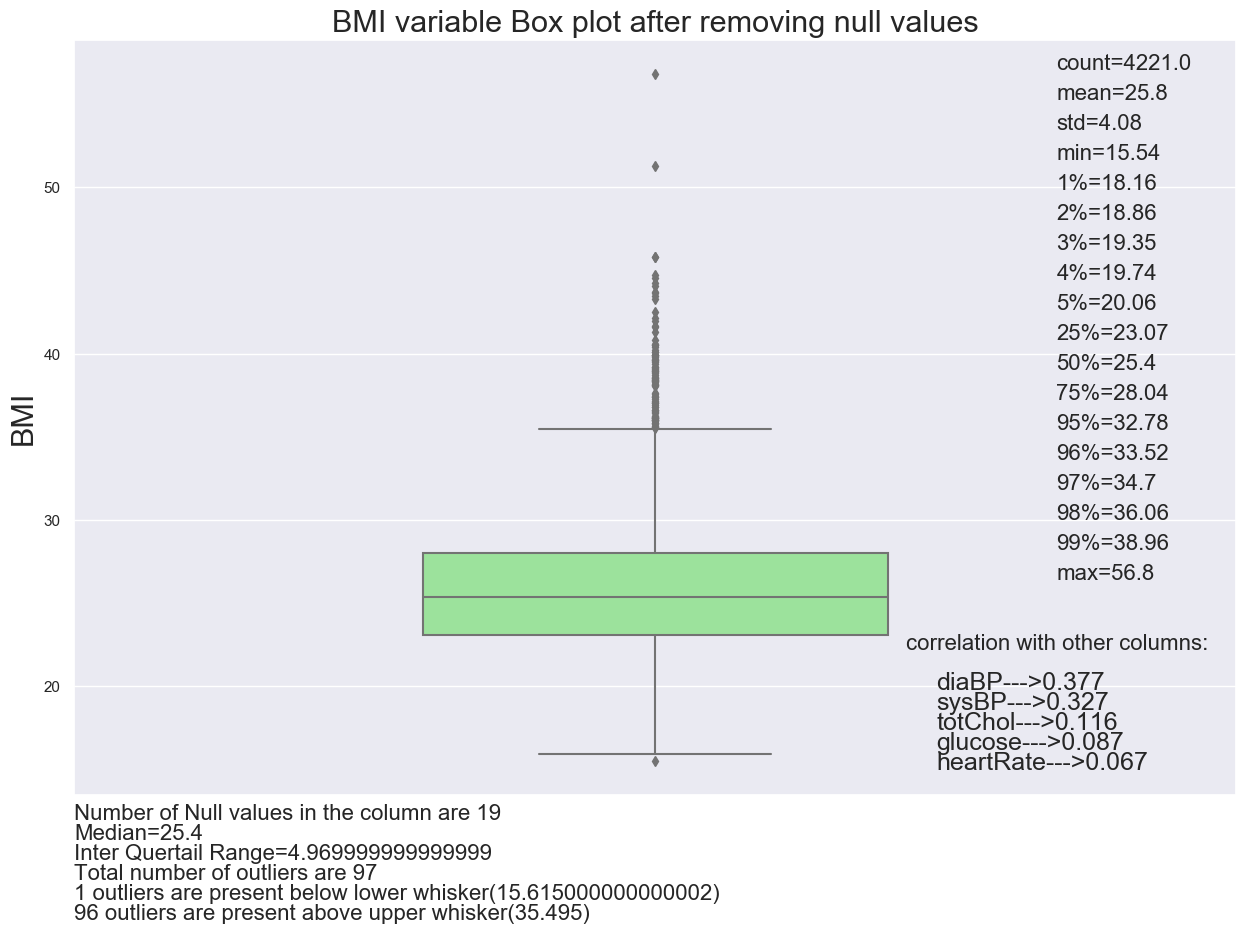

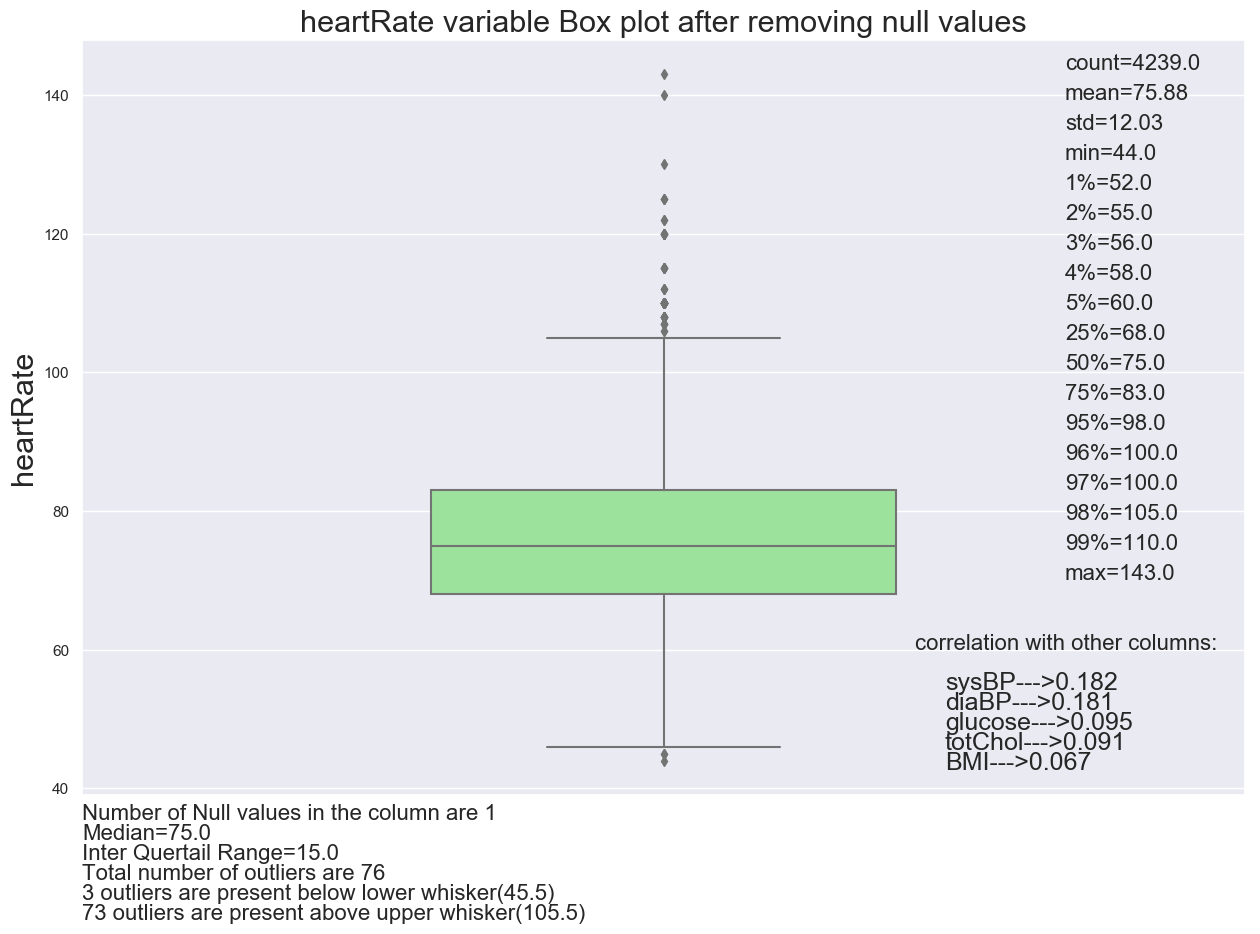

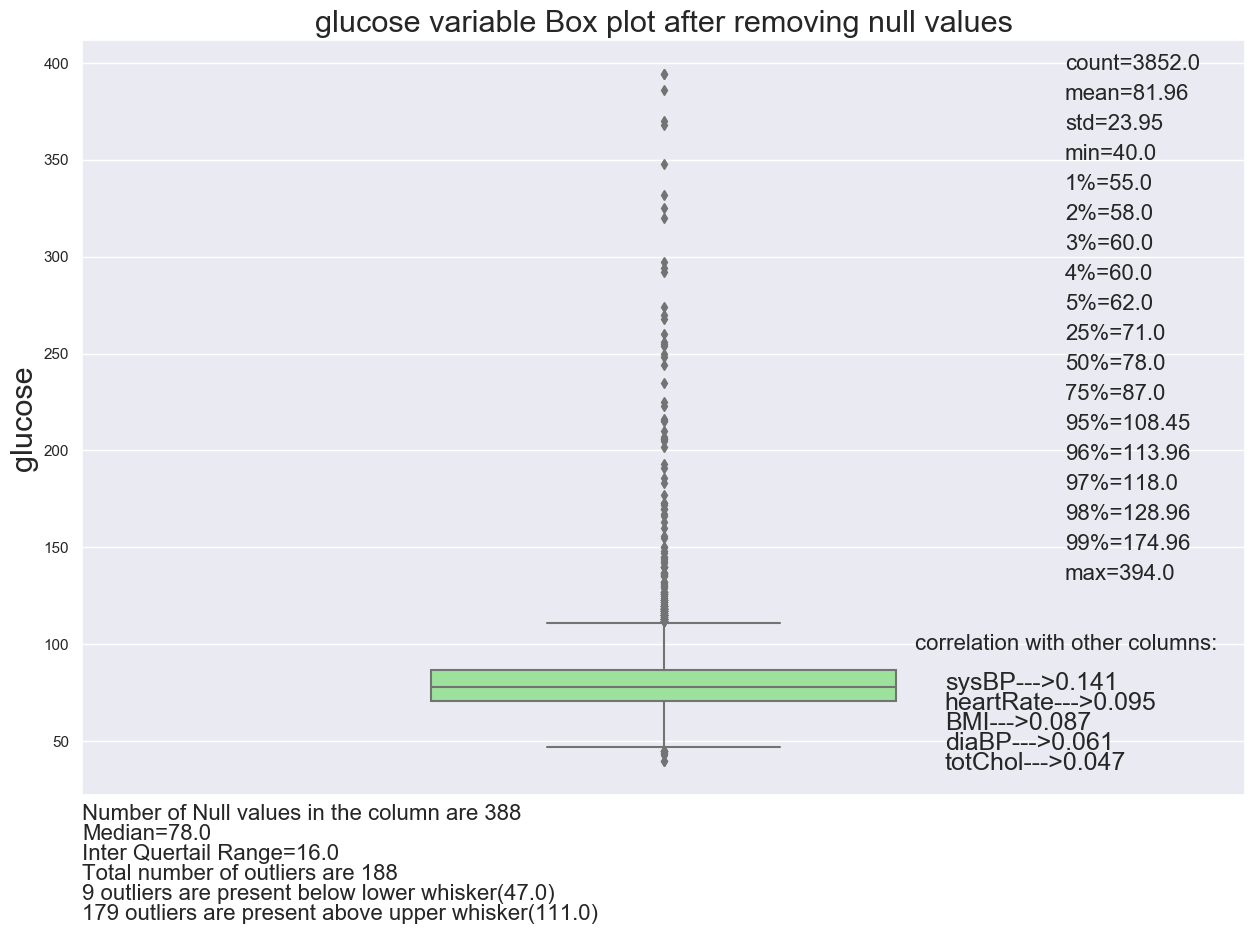

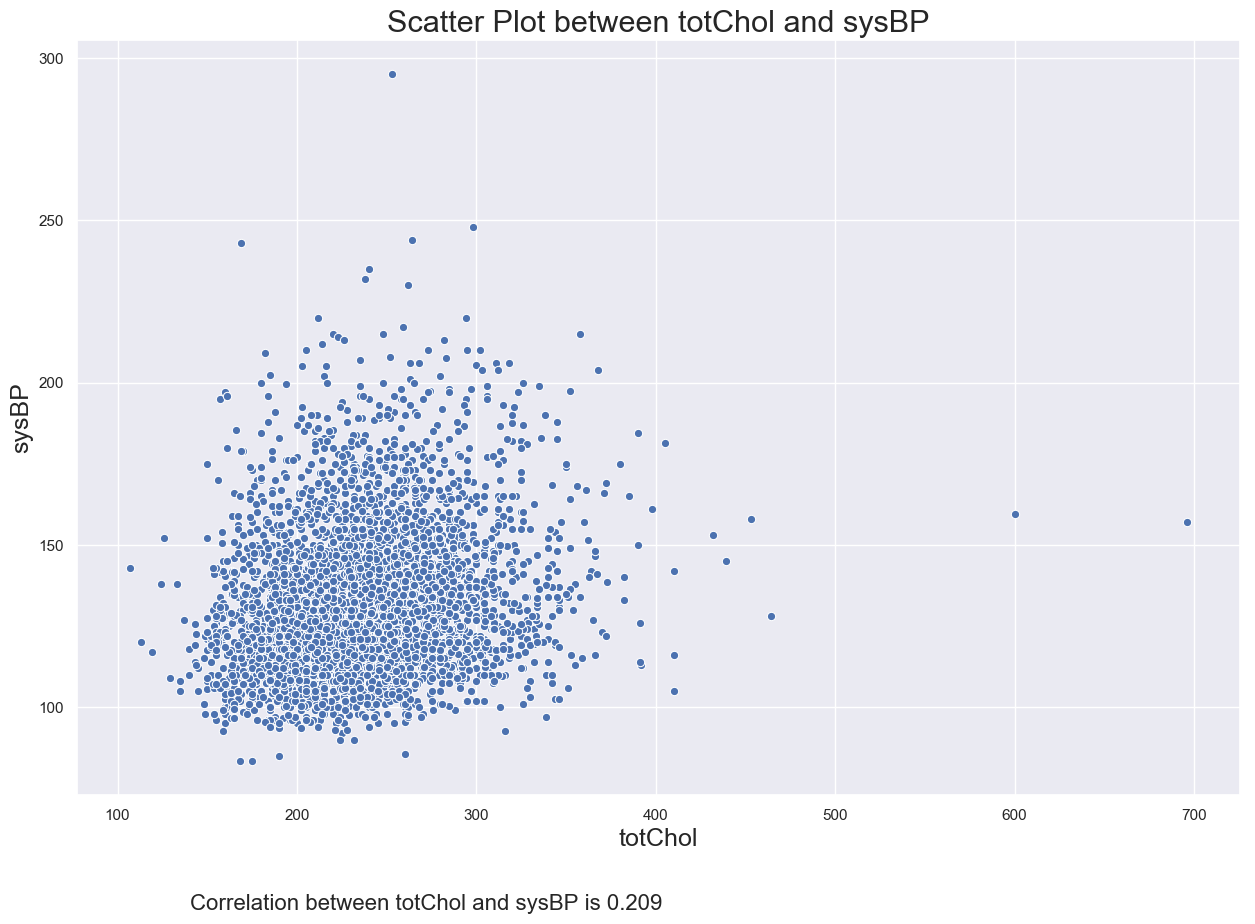

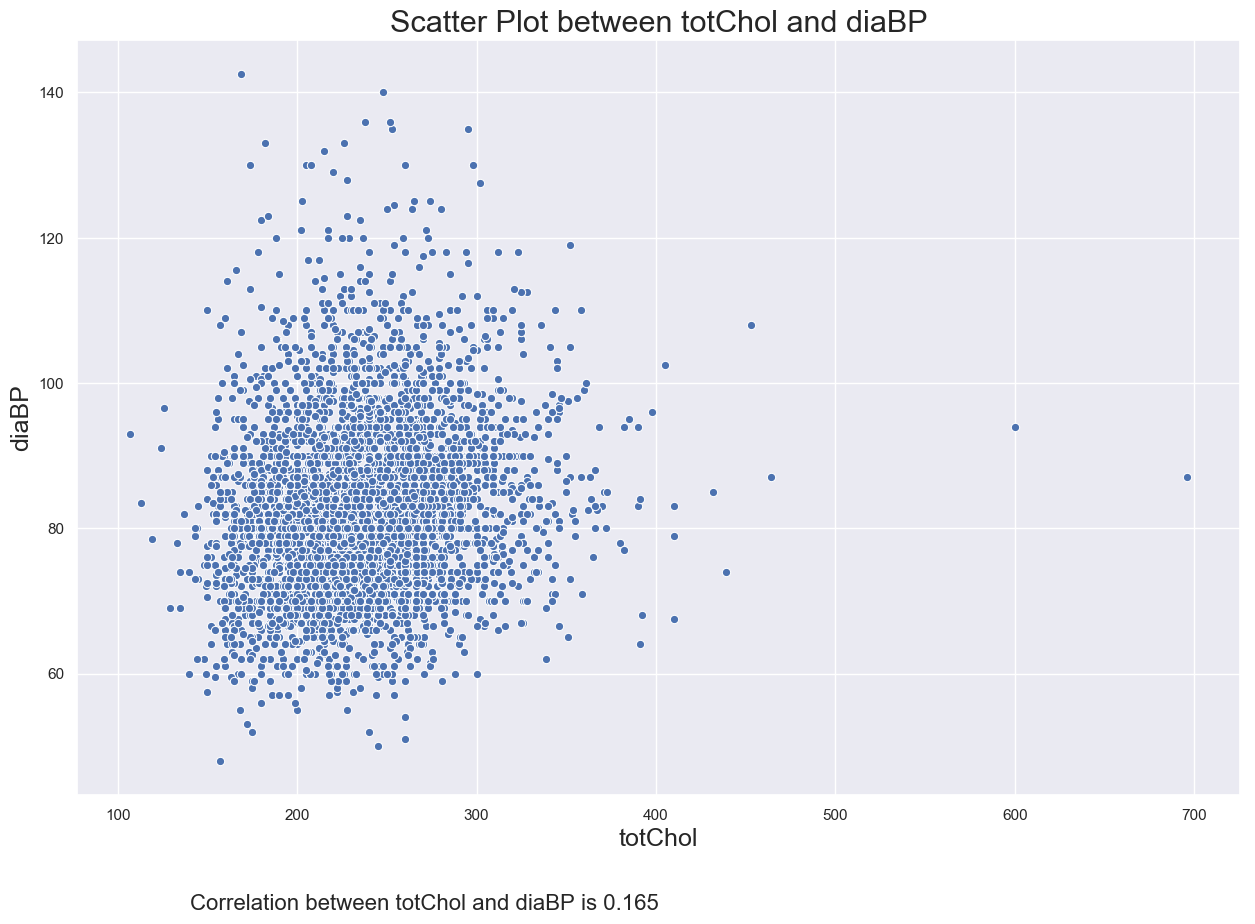

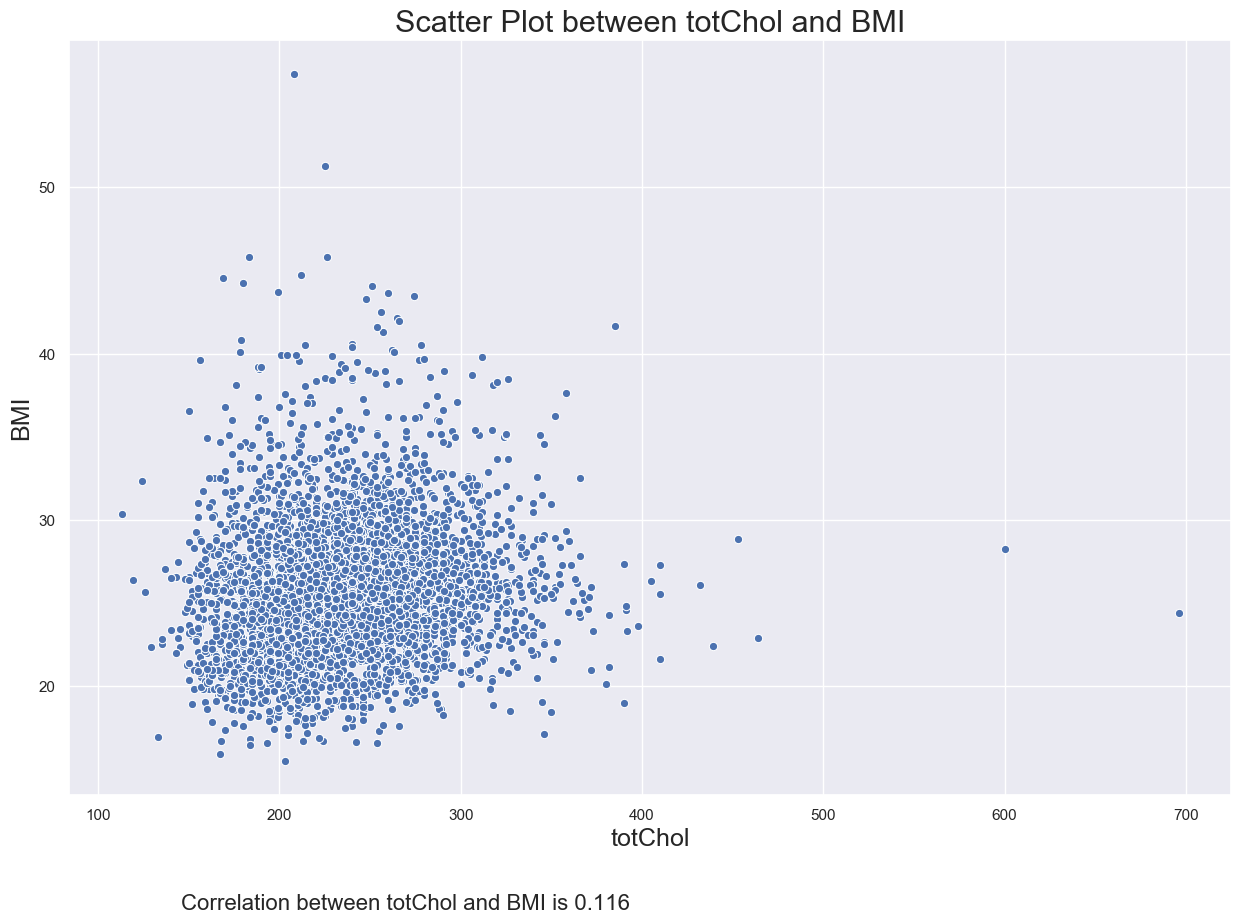

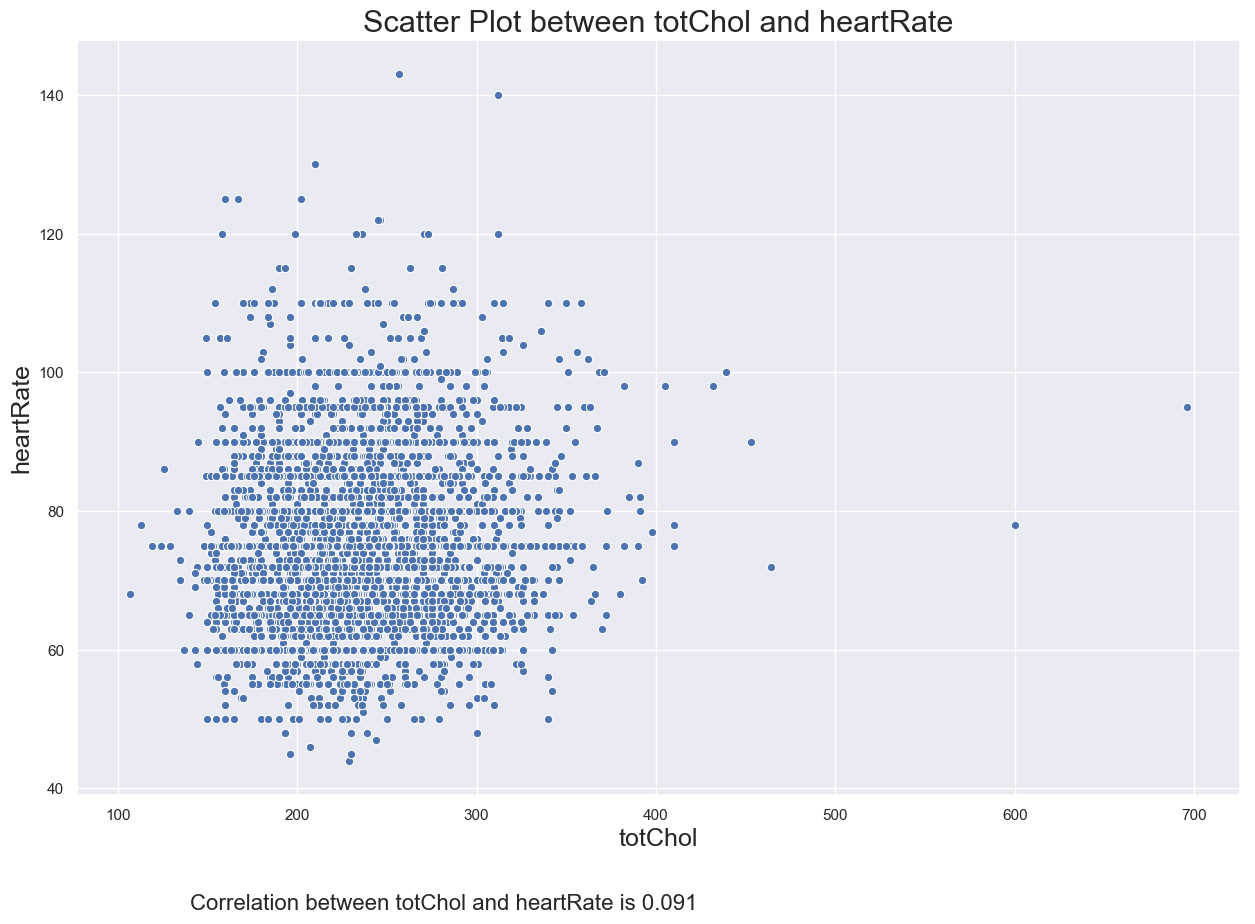

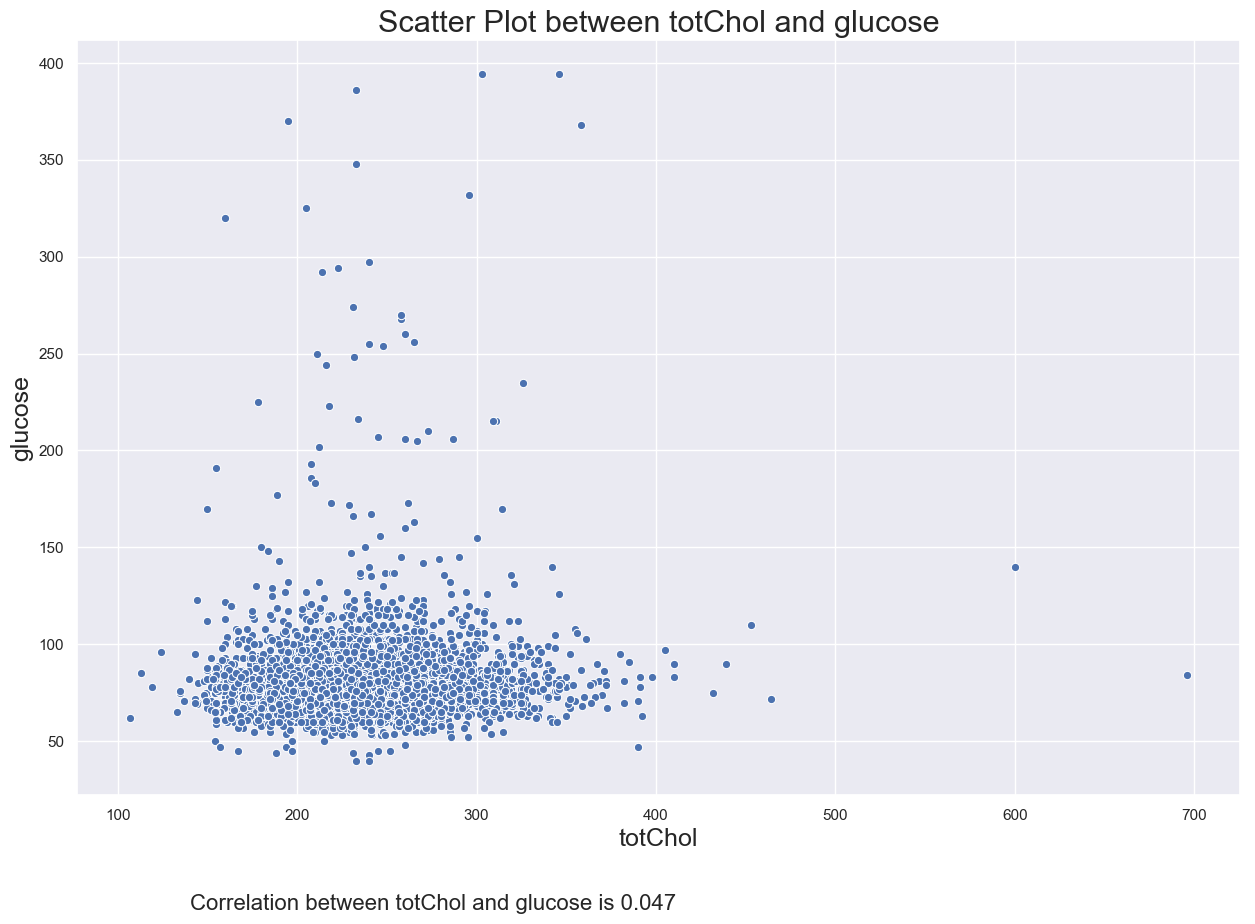

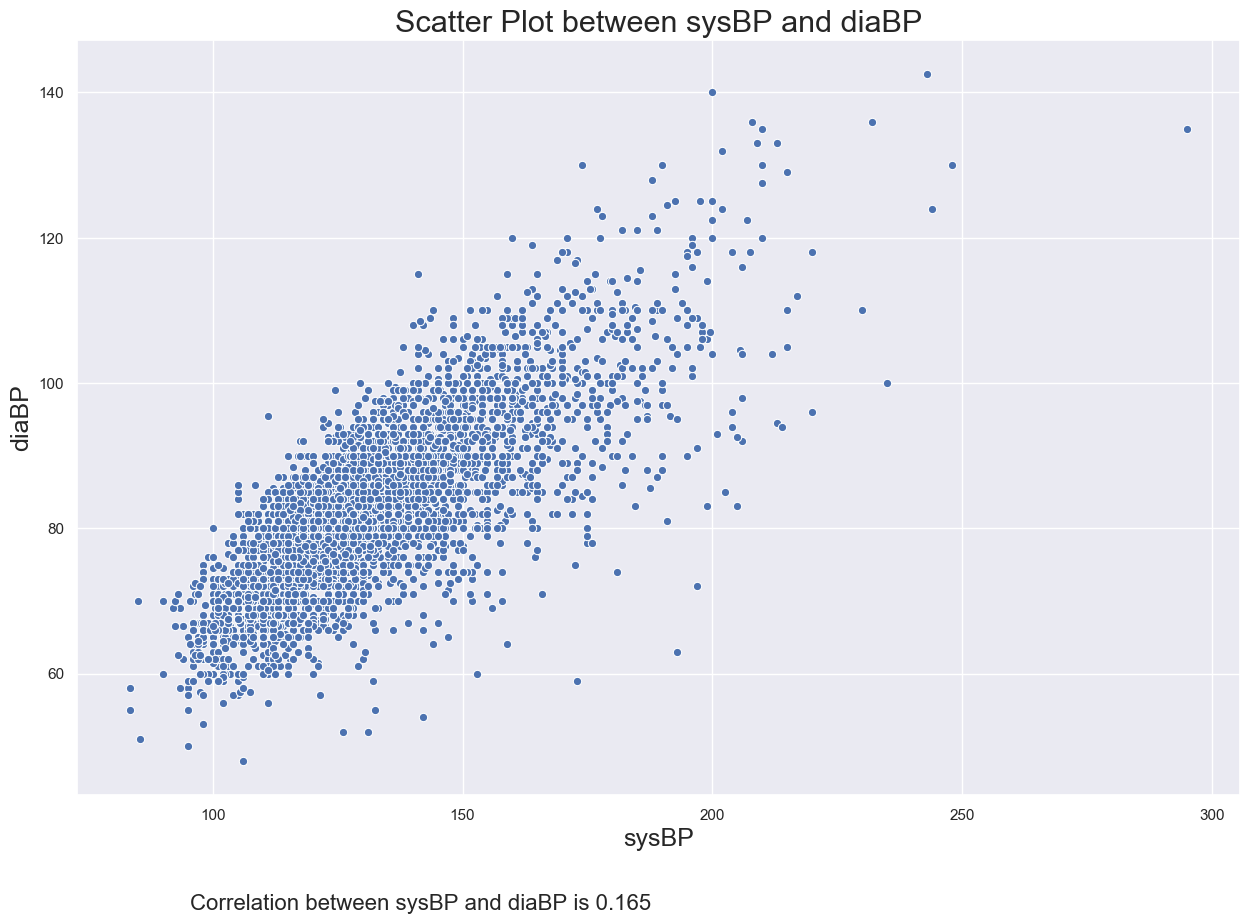

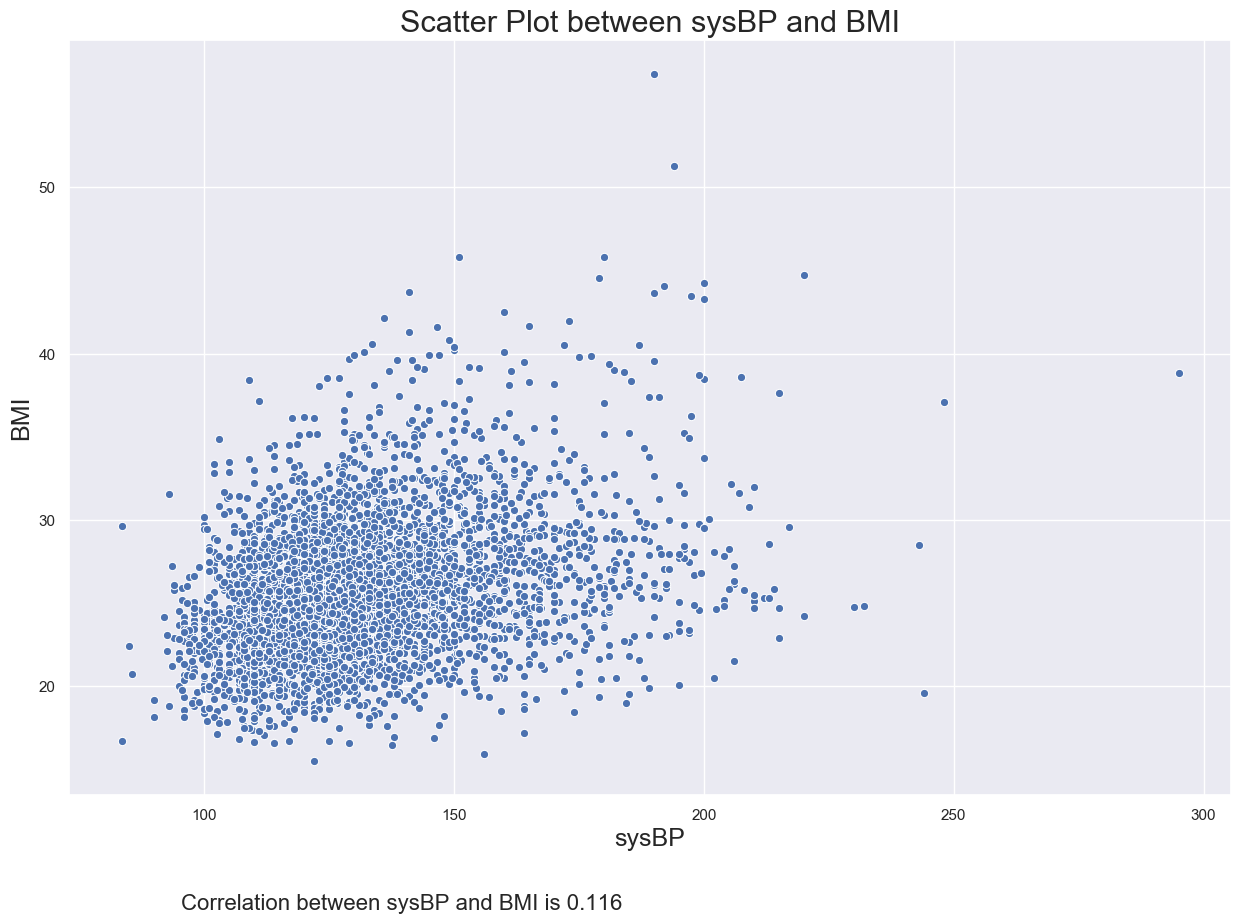

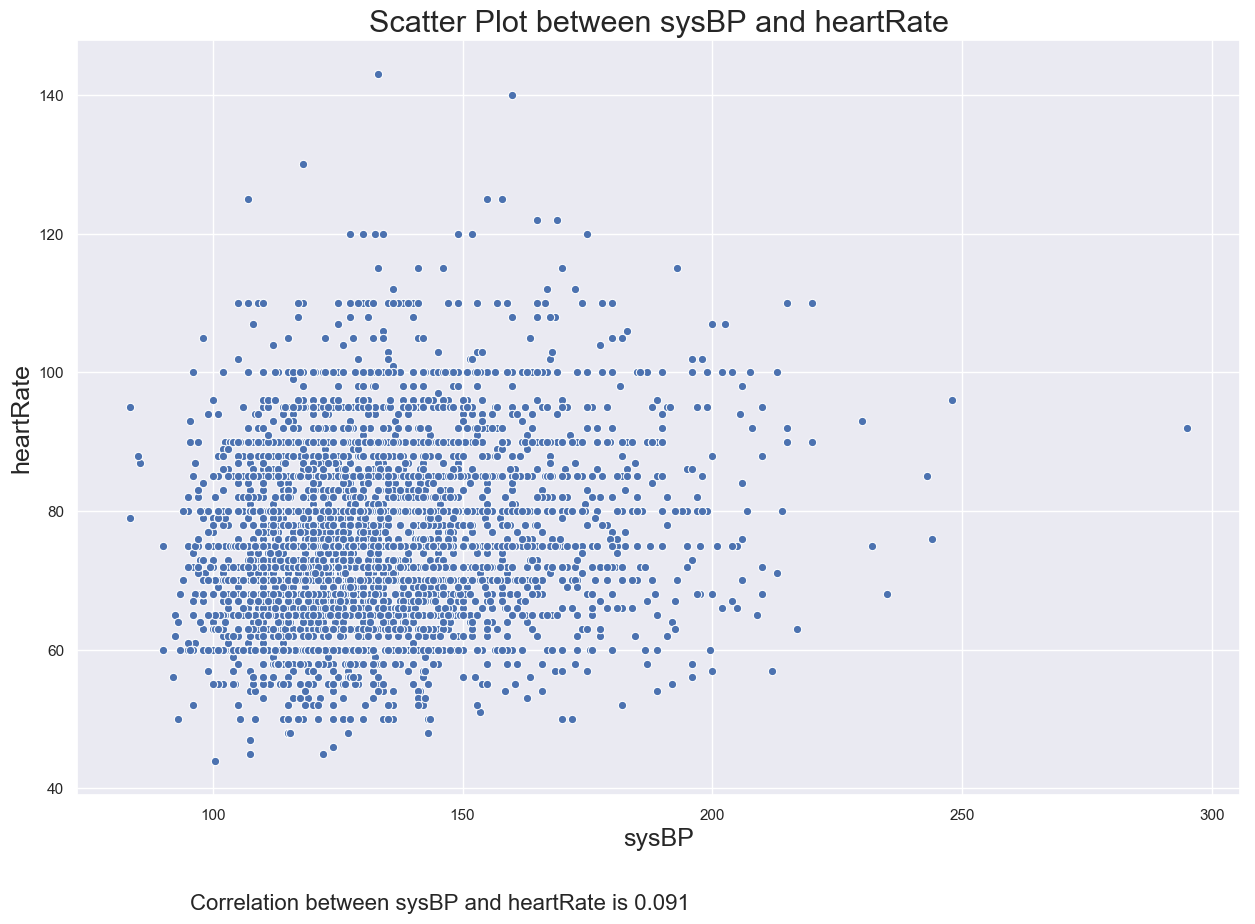

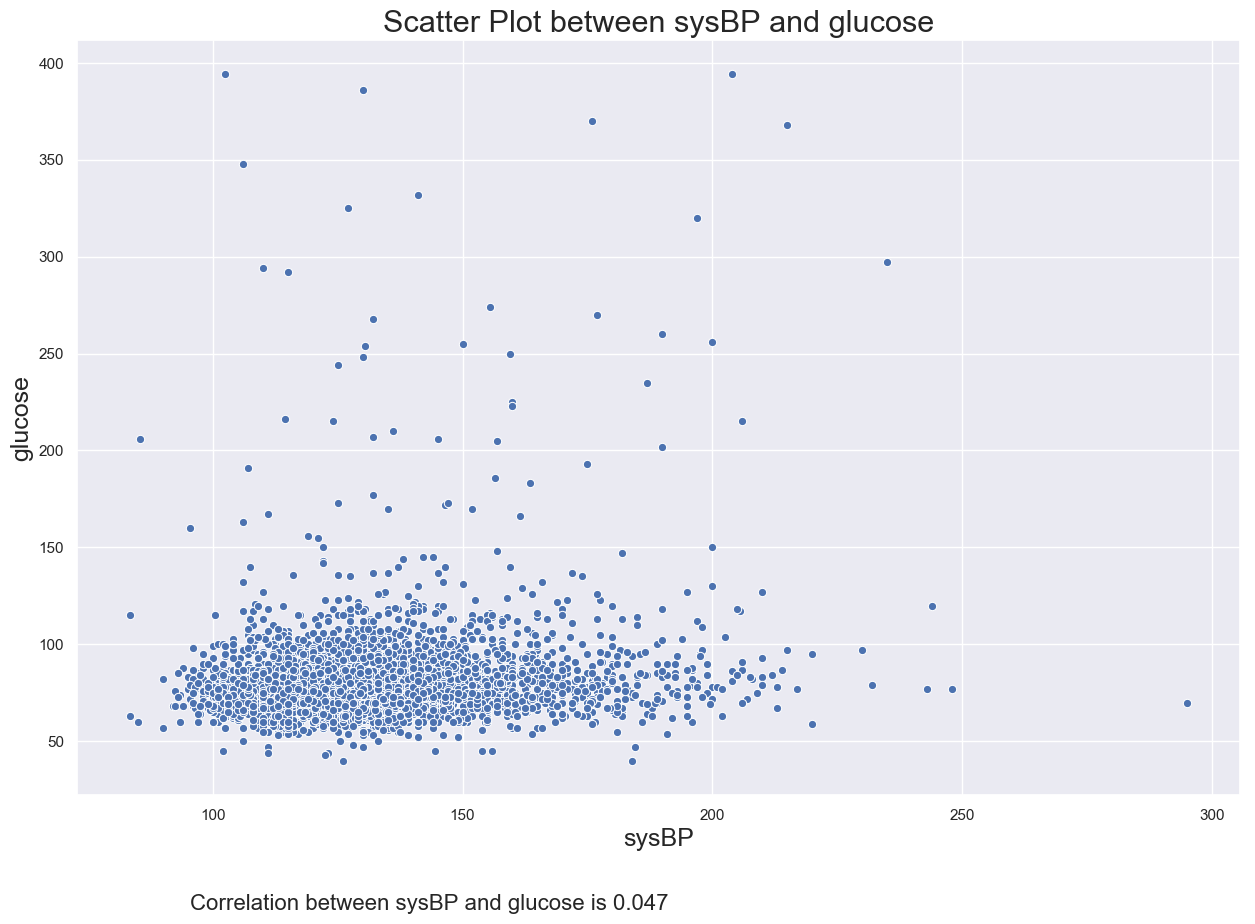

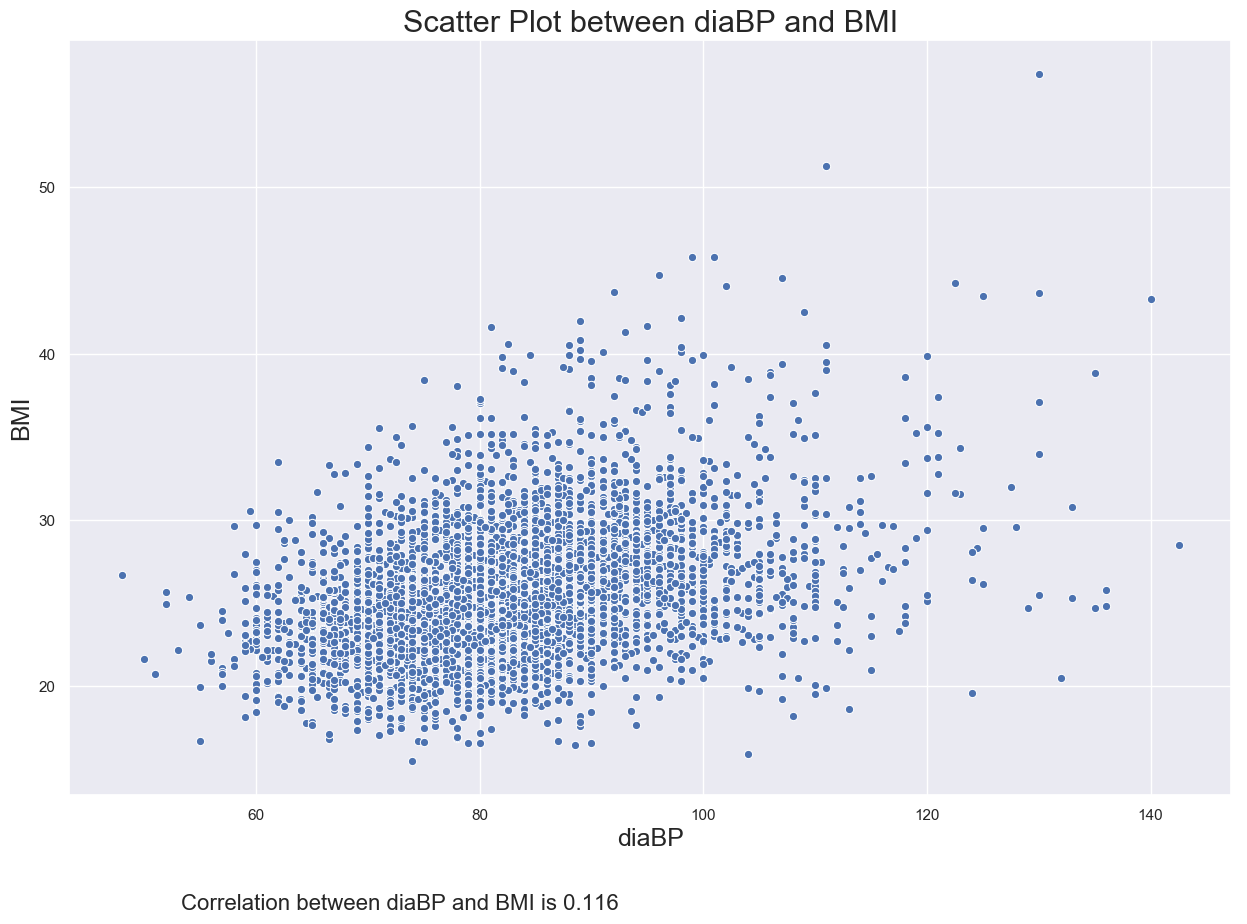

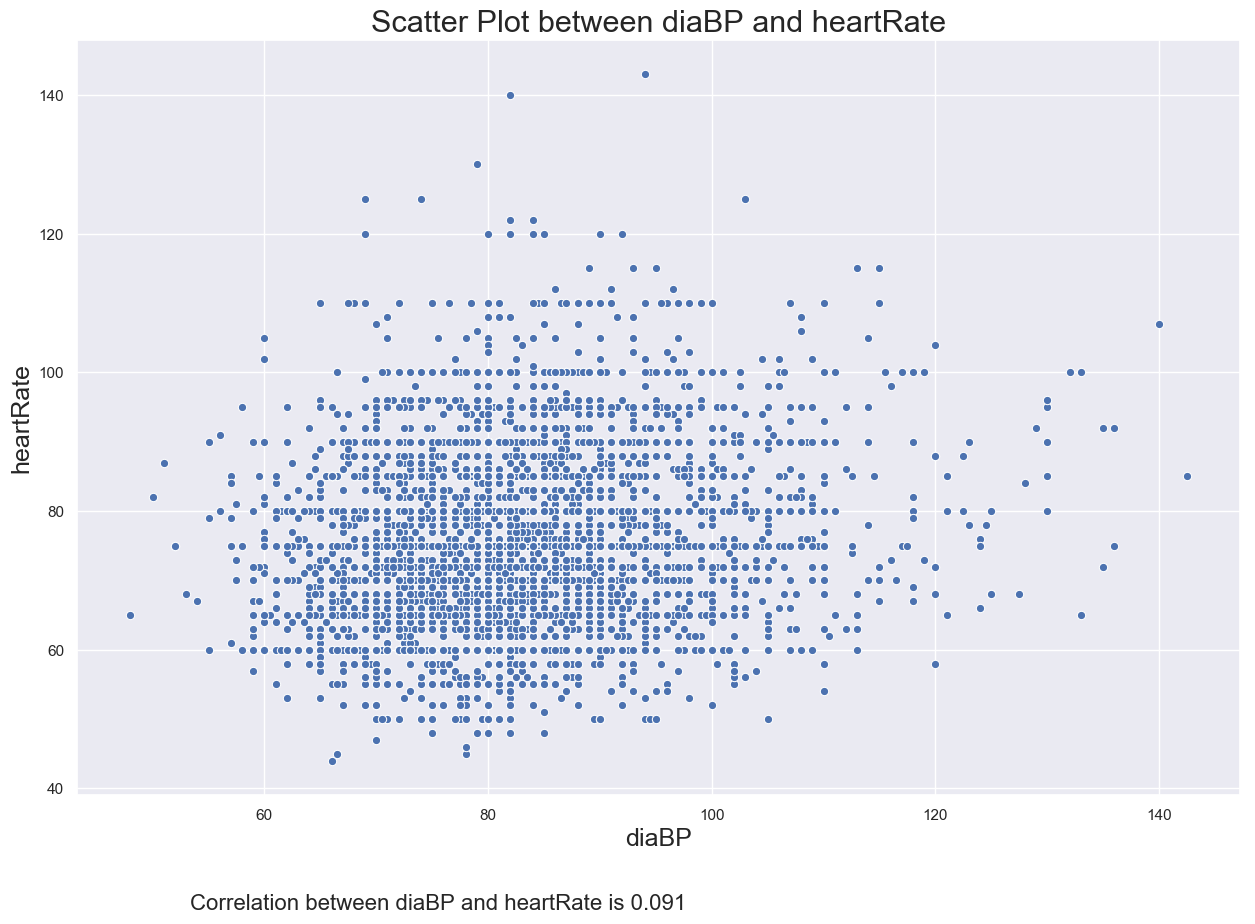

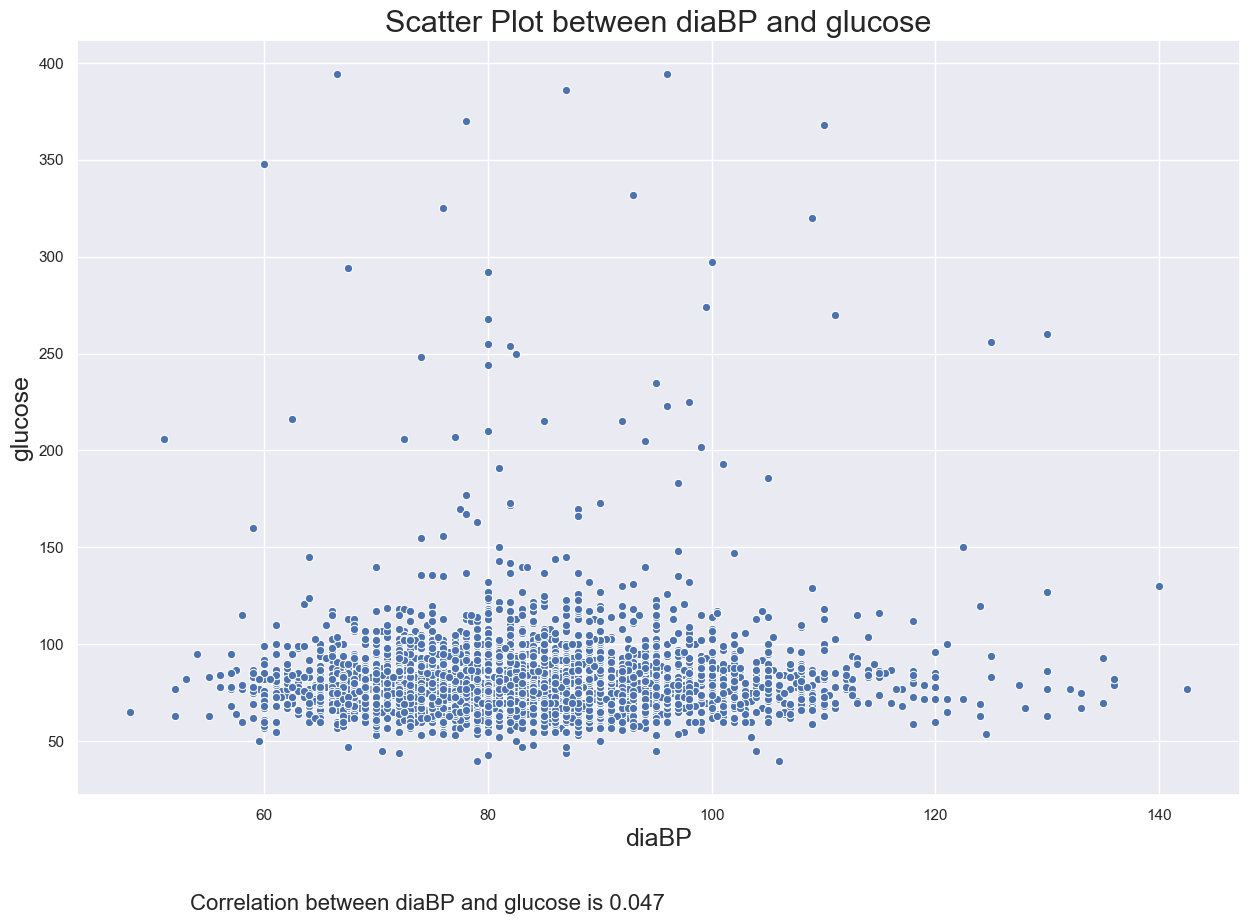

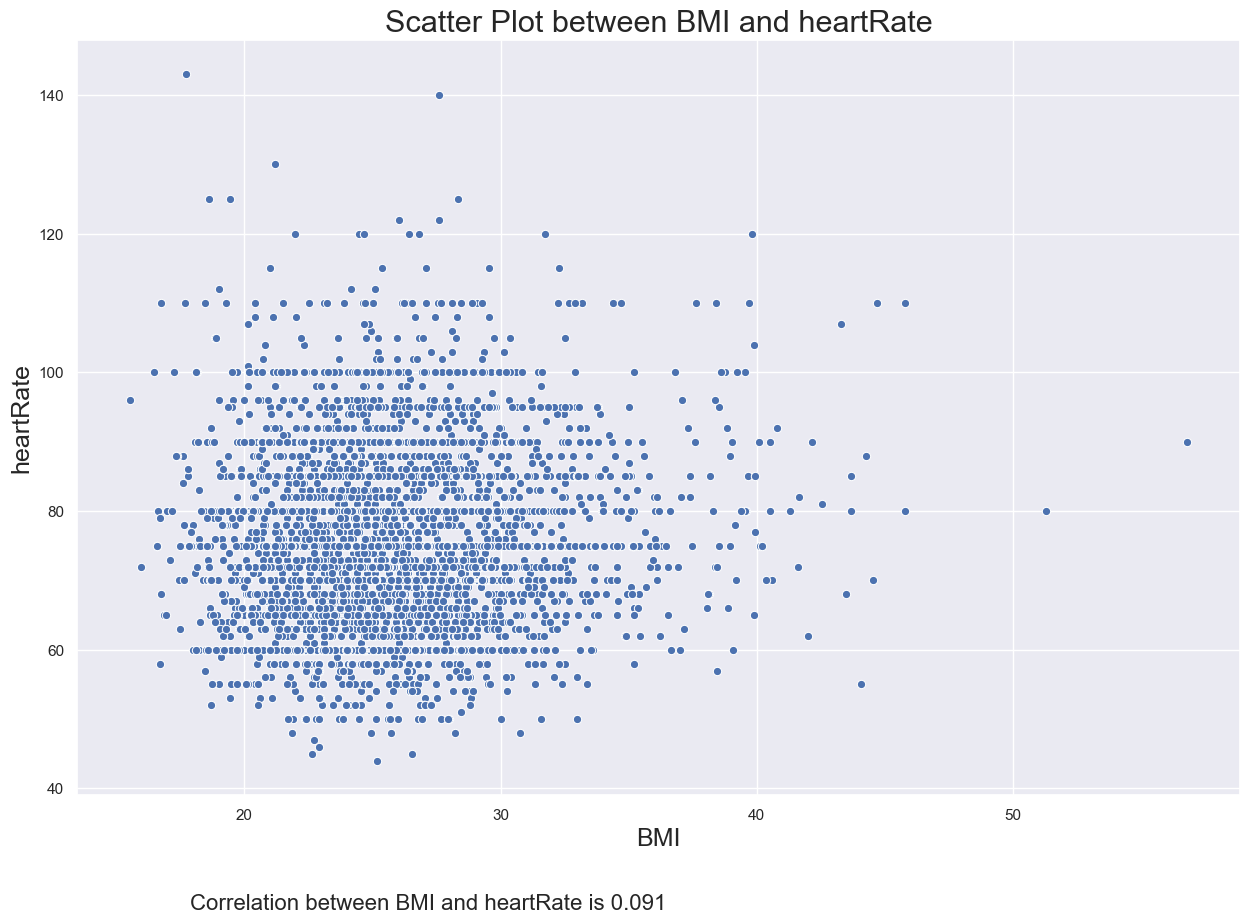

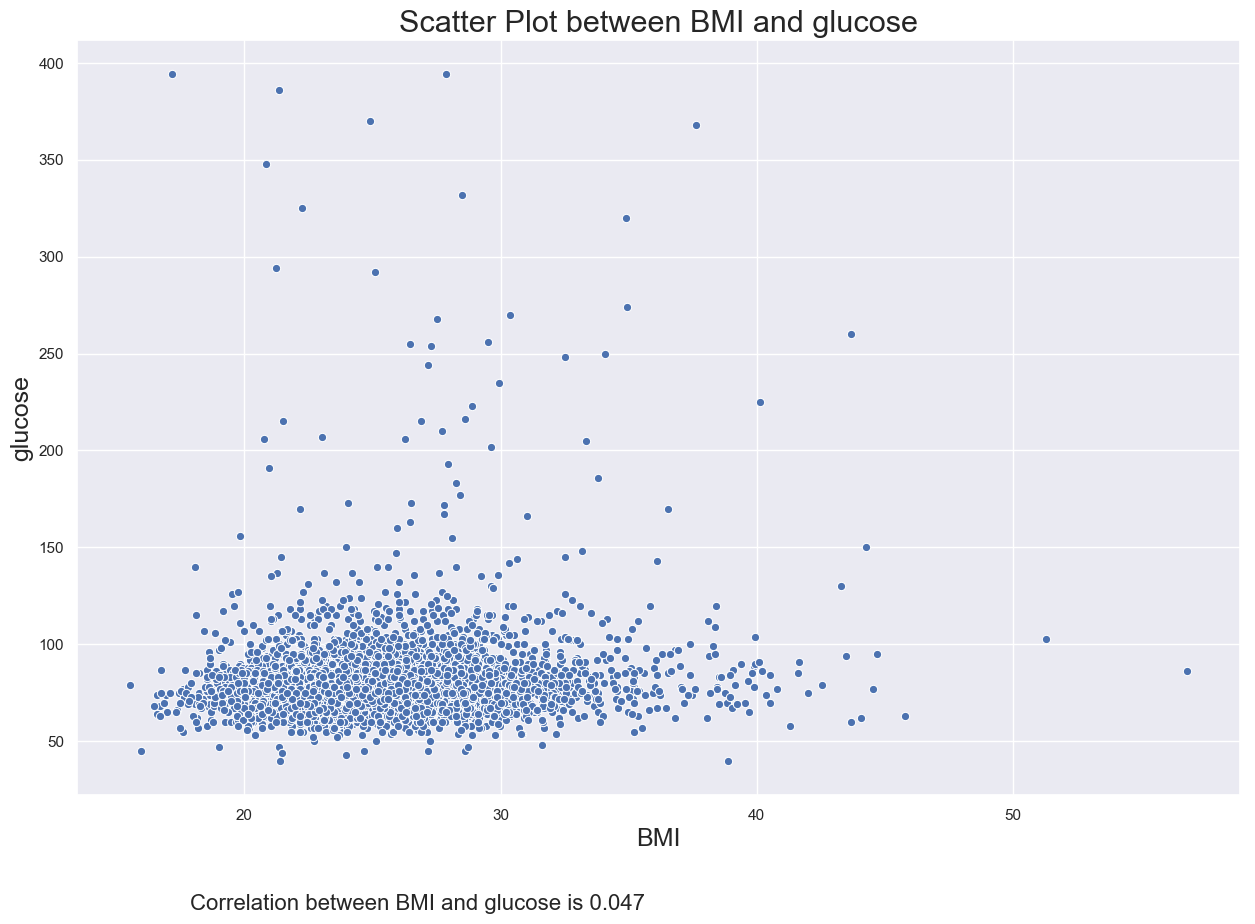

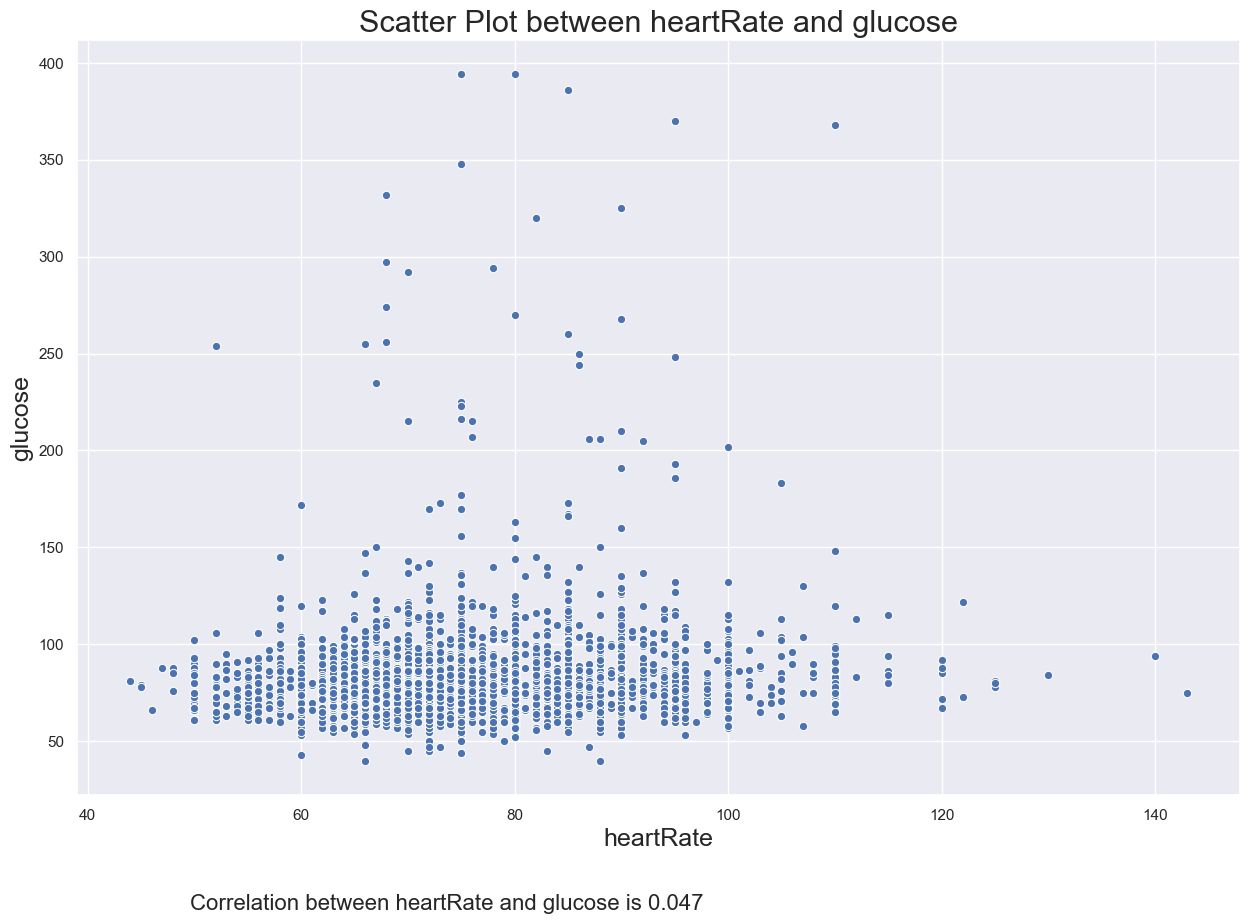

Final directory C:\Users\USER\Desktop\SEM1Pythonproject


<Figure size 1500x1000 with 0 Axes>

In [57]:
GraphsCreator(fam)